##### Copyright 2020 The TensorFlow Authors.

# Training + evaluation + testing with the built-in methods

## Setup

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

2022-06-30 21:42:18.366566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-30 21:42:18.366586: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Now, let's review each piece of this workflow in detail.

In [3]:
model = tf.keras.models.load_model('model_saved')


import numpy as np 
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import mpl_style
plt.style.use(mpl_style.style1)

def cut_plot(lbins,ubins,data):
    # carry out the removal of bins on the plots
    # lbins: nº of bins to remove on the left side
    # ubins: nº of bins to remove on the right side
    bins = data[lbins:-ubins,0]
    output = data[lbins:-ubins,1:]
    return bins,output

nparam = 10
nmodels = 1000
sim = 'UNIT100' # simulation used
# array with the name of the plots we want to use
plots = ['KLF_z0','rLF_z0','early-t_z0','late-t_z0','HIMF_z0','early-f_z0','TF_z0',
         'bulge-BH_z0','Zstars_z0','KLF_z1.1']
xlabel = []
ylabel = []
xlim = []
ylim = []
# weight for each plot in the emulator training
weight = [1,1,1,1,1,1,1,1,1,1]

def check_cut(ind,nmodels,bins,output,xlab,ylab):
    count = 0
    fig = plt.figure(ind)
    for i in range(nmodels):
        count += np.shape(np.where(output[:,i]==0))[1]%%!
        plt.plot(bins[:,0],output[:,i])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    return count
        
# loading data
# DATA MUST BE ALREADY SHUFFLE
len_b = np.array([])
bins = np.array([])
output = np.array([])
for i in range(len(plots)):
    
    file = plots[i]+sim+'.dat'
    data = np.loadtxt(file)
    bins0,output0 = cut_plot(lbins,ubins,data)
    count = check_cut(0,nmodels,bins0,output0,)
    print(count)
    len_b = np.concatenate([len_b,len(bins0)])
    bins = np.concatenate([bins,bins0])
    output = np.concatenate([output,output0])
            
nbins = len(bins)
        
# input free parameters (Latin Hypercube)
# DATA ALREADY SHUFFLE IN THE SAME WAY AS OUTPUT
input_p = np.loadtxt('input_shuffle.dat')

    
# divide training (80%), evaluation (20%), test (20%)
n_train = 0.8*nmodels
n_eval = 0.2*nmodels
n_test = 0.2*nmodels

output = np.transpose(output)
output_test = output[:n_test]
input_test = input_p[:n_test]
output_training = output[n_test:]
input_training = input_p[n_test:]
# shuffling data train and evaluation
#np.random.shuffle(data_train)
input_train = input_training[:n_train]
output_train = output_training[:n_train]
input_eval = input_training[n_train:]
output_eval = output_training[n_train:]

(x_train, y_train) = (input_train, output_train)
(x_eval, y_eval) = (input_eval, output_eval)
(x_test, y_test) = (input_test, output_test)


x_train_f = x_train.astype("float32")
x_eval_f = x_eval.astype("float32")
x_test_f = x_test.astype("float32")
y_train_f = y_train.astype("float32")
y_eval_f = y_eval.astype("float32")
y_test_f = y_test.astype("float32")

2022-06-30 21:42:19.864090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 21:42:19.864410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-30 21:42:19.864470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-30 21:42:19.864518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-30 21:42:19.864564: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

(250, 3)
(27, 250)
(34, 250)
(14, 250)
(19, 250)
[  1.28386812 365.58390649   1.2391358 ]
[-4.50863831 -4.38721614 -4.14874165 -3.98927613 -3.80826961 -3.63171312
 -3.49147028 -3.28066871 -3.12726117 -3.00348833 -2.91009489 -2.82318552
 -2.71681188 -2.65266998 -2.55830486 -2.45661496 -2.32845691 -2.17532107
 -2.01457353 -1.86520155 -1.75779411 -1.68117523 -1.63010725 -1.59312784
 -1.56266174 -1.54242842 -1.53794658]
[-4.95860731 -4.78251606 -4.64781748 -4.45593196 -4.22548303 -4.03621217
 -3.88941029 -3.67264107 -3.55752023 -3.44977165 -3.30495634 -3.18909572
 -3.02387938 -2.89397918 -2.72885568 -2.58829614 -2.40093609 -2.18822398
 -1.98851414 -1.83598936 -1.74096787 -1.66878535 -1.62093028 -1.57351314
 -1.53437924 -1.51103352 -1.49759337 -1.49833835 -1.50413665 -1.51042117
 -1.51476139 -1.51282626 -1.49818104 -1.47920871]
[-1.29599112 -1.34672476 -1.44891613 -1.58360083 -1.89789231 -2.30333788
 -2.42916529 -2.62360556 -2.8645493  -3.15552282 -3.56623017 -3.97674754
 -4.31425826 -4.721

In [4]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test_f, y_test_f, batch_size=1)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for samples")
predictions = model.predict(x_test_f)#print(predictions)
print("predictions shape:", predictions.shape)

mae_a = []
maeObject = keras.losses.MeanAbsoluteError()
for i in range(n_test):
    maeTensor = maeObject(y_test_f[i,:], predictions[i])
    mae = maeTensor.numpy()
    print(mae)
    mae_a.append(mae)
mae_a = np.array(mae_a)    

print(model.metrics_names)


(25, 3)
(25, 81)
Evaluate on test data
25/25 [==============================] - 0s 797us/step - loss: 0.0362
test loss, test acc: 0.036241091787815094
Generate predictions for samples
predictions shape: (25, 81)
0.03867496
0.023809504
0.022626081
0.034408566
0.052109484
0.06910689
0.045730755
0.060998715
0.032550905
0.012885803
0.020426666
0.054590892
0.025692489
0.021935485
0.02623931
0.013935361
0.03966791
0.05666817
0.052218985
0.03389403
0.0736518
0.01717304
0.020092823
0.027586063
0.029352812
['loss']


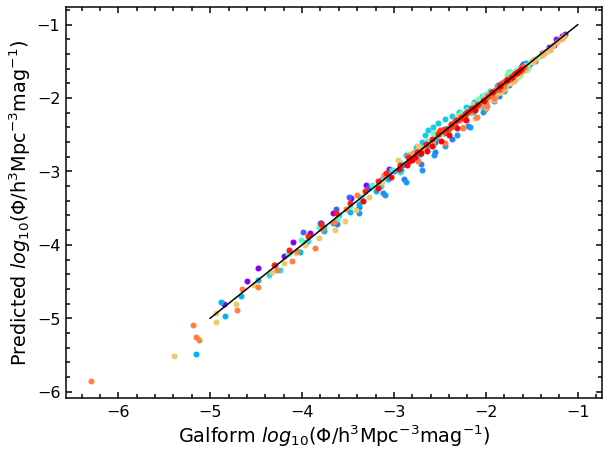

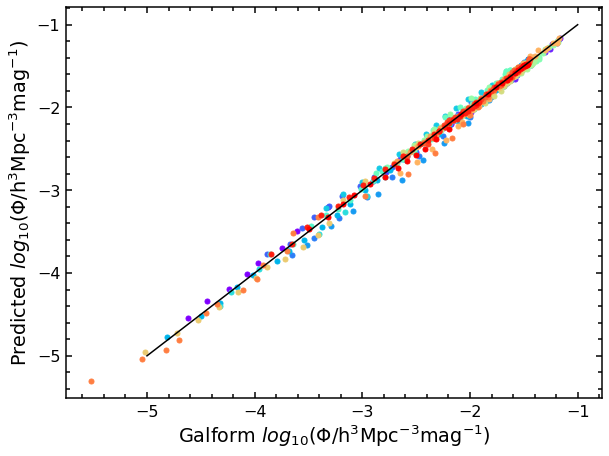

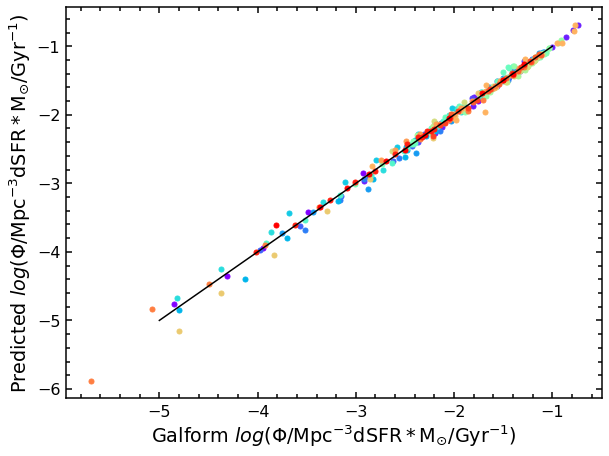

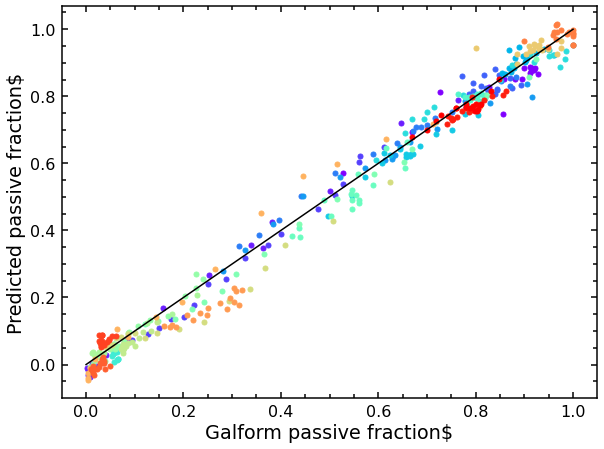

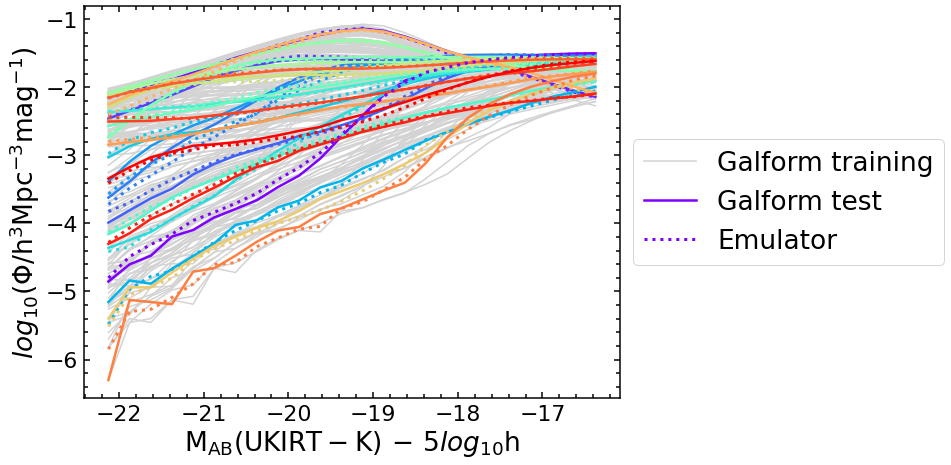

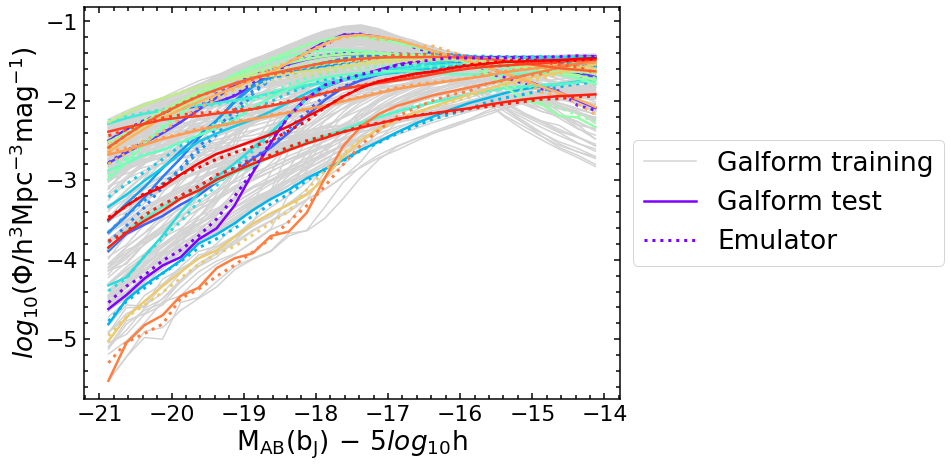

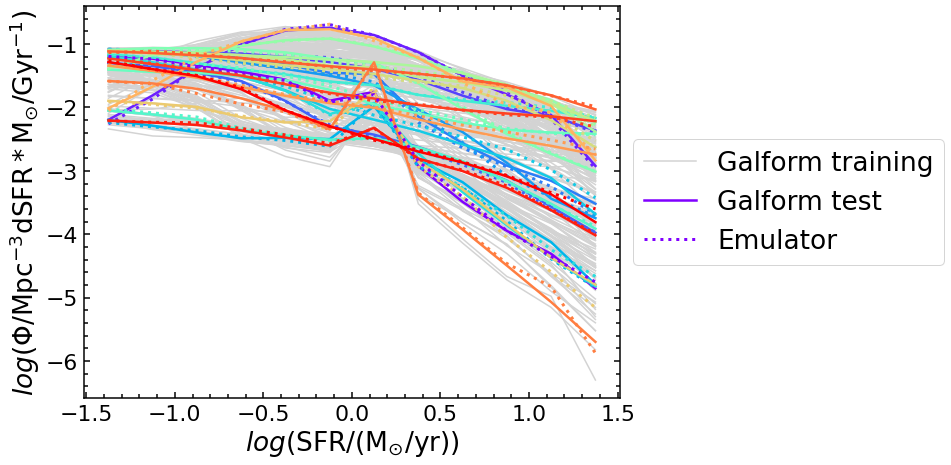

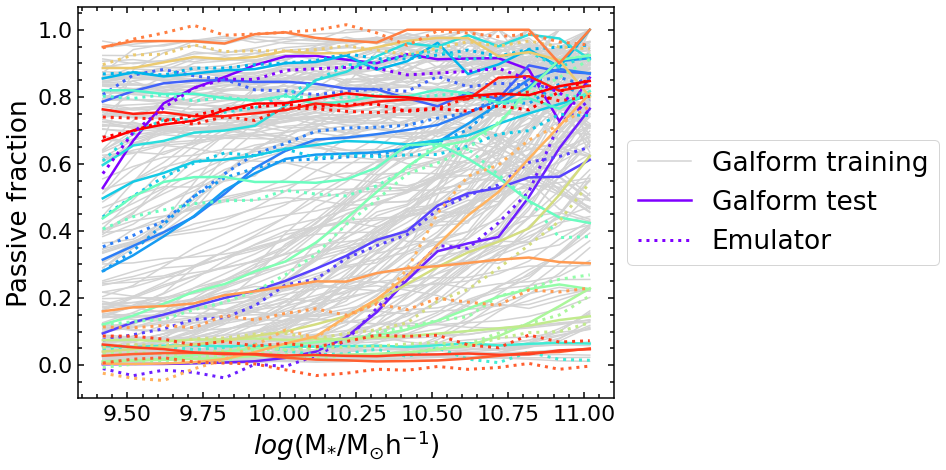

In [5]:
from matplotlib.pyplot import cm

def check_test(ind,n_train,galf,pred,xlab,ylab,xlim,ylim,file,comm):
    fig = plt.figure(ind,figsize=(9.6,7.2))
    for i,c in zip(range(n_test),color):
        plt.plot(galf[i,:],pred[i,:],'.',c=c,markersize=10)
    plt.plot(np.linspace(xlim[0],xlim[1],100),np.linspace(ylim[0],ylim[1],100),'-k')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    
    #galf = galf.flatten()
    #pred = pred.flatten()
    # ratio
    #tofile = zip(galf,pred/galf)
    #with open(file, 'w') as outf: # written mode (not appended)
    #    outf.write(comm)
    #    np.savetxt(outf,list(tofile))#,fmt=('%.5f'))
    #    outf.closed 
    return

acum = 0
for i in range(len(plots)):
    
    if plots[i]=='KLF_z0':
        check_test(0,n_train,output_test[acum:acum+len_b[0]],predictions[acum:acum+len_b[0]])
        acum += len_b[0]
    elif plots[i]=='rLF_z0':
        check_test(1,n_train,output_test[acum:acum+len_b[1]],predictions[acum:acum+len_b[1]])
        acum += len_b[1]
    elif plots[i]=='early-t_z0':
        check_test(2,n_train,output_test[acum:acum+len_b[2]],predictions[acum:acum+len_b[2]])
        acum += len_b[2]
    elif plots[i]=='late-t_z0':
        check_test(3,n_train,output_test[acum:acum+len_b[3]],predictions[acum:acum+len_b[3]])
        acum += len_b[3]
    elif plots[i]=='HIMF_z0':
        check_test(4,n_train,output_test[acum:acum+len_b[4]],predictions[acum:acum+len_b[4]])
        acum += len_b[4]
    elif plots[i]=='early-f_z0':
        check_test(5,n_train,output_test[acum:acum+len_b[5]],predictions[acum:acum+len_b[5]])
        acum += len_b[5]
    elif plots[i]=='TF_z0':
        check_test(6,n_train,output_test[acum:acum+len_b[6]],predictions[acum:acum+len_b[6]])
        acum += len_b[6]
    elif plots[i]=='bulge-BH_z0':
        check_test(7,n_train,output_test[acum:acum+len_b[7]],predictions[acum:acum+len_b[7]])
        acum += len_b[7]
    elif plots[i]=='Zstars_z0':
        check_test(8,n_train,output_test[acum:acum+len_b[8]],predictions[acum:acum+len_b[8]])
        acum += len_b[8]
    elif plots[i]=='KLF_z1.1':
        check_test(9,n_train,output_test[acum:acum+len_b[9]],predictions[acum:acum+len_b[9]])
        acum += len_b[9]
    elif plots[i]=='mgasf_z0':
        check_test(10,n_train,output_test[acum:acum+len_b[10]],predictions[acum:acum+len_b[10]])
        acum += len_b[10]



plt.rcParams.update({'font.size': 22})

def check_test2(ind,n_train,n_test,bins,output,galf,pred,xlab,ylab,xlim,ylim):
    fig = plt.figure(ind,figsize=(9.6,7.2))
    for i in range(n_train):
        if i==0:
            plt.plot(bins[:,0],output[:,i],c='lightgrey',ls='-',label='Galform training')  
        else:
            plt.plot(bins[:,0],output[:,i],c='lightgrey',ls='-')  
    for i, c in zip(range(n_test), color):
        if i==0:
            plt.plot(bins[:,0],galf[i,:],'-',c=c,linewidth=2.5,label='Galform test')
            plt.plot(bins[:,0],pred[i,:],':',c=c,linewidth=3,label='Emulator',zorder=200)
        else:
            plt.plot(bins[:,0],galf[i,:],'-',c=c,linewidth=2.5)
            plt.plot(bins[:,0],pred[i,:],':',c=c,linewidth=3)    
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # Put a legend to the right of the current axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    return

acum = 0
for i in range(len(plots)):
    
    if plots[i]=='KLF_z0':
        check_test2(0,n_train,n_test,bins[acum:acum+len_b[0]],output_train[acum:acum+len_b[0]],output_test[acum:acum+len_b[0]],predictions[acum:acum+len_b[0]])
        acum += len_b[0]
    elif plots[i]=='rLF_z0':
        check_test2(1,n_train,n_test,bins[acum:acum+len_b[1]],output_train[acum:acum+len_b[1]],output_test[acum:acum+len_b[1]],predictions[acum:acum+len_b[1]])
        acum += len_b[1]
    elif plots[i]=='early-t_z0':
        check_test2(2,n_train,n_test,bins[acum:acum+len_b[2]],output_train[acum:acum+len_b[2]],output_test[acum:acum+len_b[2]],predictions[acum:acum+len_b[2]])
        acum += len_b[2]
    elif plots[i]=='late-t_z0':
        check_test2(3,n_train,n_test,bins[acum:acum+len_b[3]],output_train[acum:acum+len_b[3]],output_test[acum:acum+len_b[3]],predictions[acum:acum+len_b[3]])
        acum += len_b[3]
    elif plots[i]=='HIMF_z0':
        check_test2(4,n_train,n_test,bins[acum:acum+len_b[4]],output_train[acum:acum+len_b[4]],output_test[acum:acum+len_b[4]],predictions[acum:acum+len_b[4]])
        acum += len_b[4]
    elif plots[i]=='early-f_z0':
        check_test2(5,n_train,n_test,bins[acum:acum+len_b[5]],output_train[acum:acum+len_b[5]],,output_test[acum:acum+len_b[5]],predictions[acum:acum+len_b[5]])
        acum += len_b[5]
    elif plots[i]=='TF_z0':
        check_test2(6,n_train,n_test,bins[acum:acum+len_b[6]],output_train[acum:acum+len_b[6]],output_test[acum:acum+len_b[6]],predictions[acum:acum+len_b[6]])
        acum += len_b[6]
    elif plots[i]=='bulge-BH_z0':
        check_test2(7,n_train,n_test,bins[acum:acum+len_b[7]],output_train[acum:acum+len_b[7]],output_test[acum:acum+len_b[7]],predictions[acum:acum+len_b[7]])
        acum += len_b[7]
    elif plots[i]=='Zstars_z0':
        check_test2(8,n_train,n_test,bins[acum:acum+len_b[8]],output_train[acum:acum+len_b[8]],output_test[acum:acum+len_b[8]],predictions[acum:acum+len_b[8]])
        acum += len_b[8]
    elif plots[i]=='KLF_z1.1':
        check_test2(9,n_train,n_test,bins[acum:acum+len_b[9]],output_train[acum:acum+len_b[9]],output_test[acum:acum+len_b[9]],predictions[acum:acum+len_b[9]])
        acum += len_b[9]
    elif plots[i]=='mgasf_z0':
        check_test2(10,n_train,n_test,bins[acum:acum+len_b[10]],output_train[acum:acum+len_b[10]],output_test[acum:acum+len_b[10]],predictions[acum:acum+len_b[10]])
        acum += len_b[10]


In [6]:
#10000 points over a latin hypercube to sample the parameter space
lhd = np.loadtxt('hypercube_10p_10000.dat')

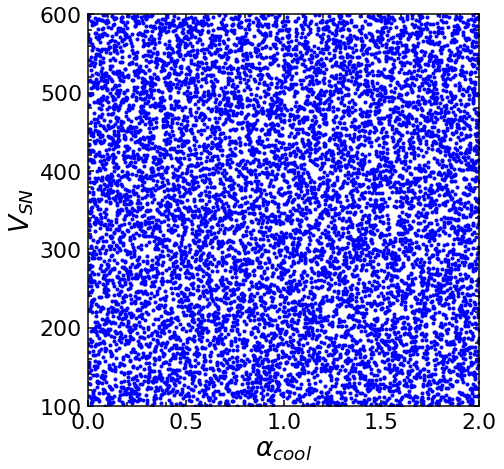

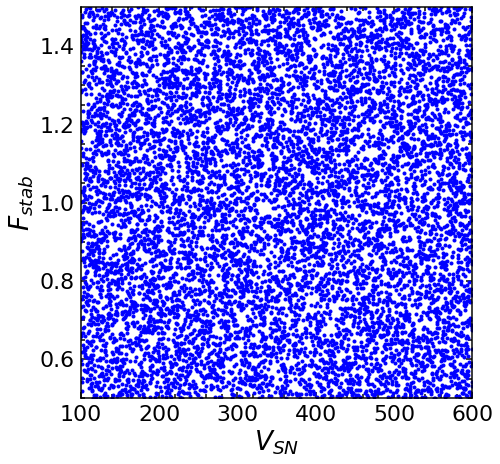

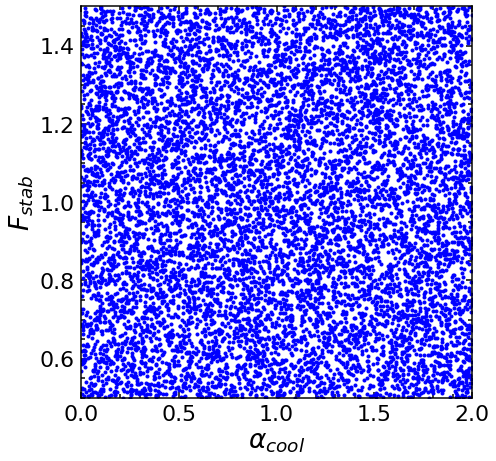

(3, 10000)


In [7]:
def plot_LH(ind,i1,i2,xlab,ylab,xlim,ylim):
    fig = plt.figure(ind,figsize=(9.8,9.8))
    ax = plt.subplot(111)
    ax.plot(lhd[:.i1],lhd[:,i2],'.b')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_xlim(xlim[0],xlim[1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_box_aspect(1)
    plt.show()
    return

for i in range(nparam):
    for j in range(nparam):
        plot_LH(i+j,i,j,)

# Generating the predictions for the 10000 points
x_post = [lhd[:,0],lhd[:,1],lhd[:,2],lhd[:,3],lhd[:,4],lhd[:,5],lhd[:,6],lhd[:,7],lhd[:,8],lhd[:,9]]
print(np.shape(x_post))
x_post = np.transpose(x_post)
z = x_post.astype("float32")
pre = model.predict(z)

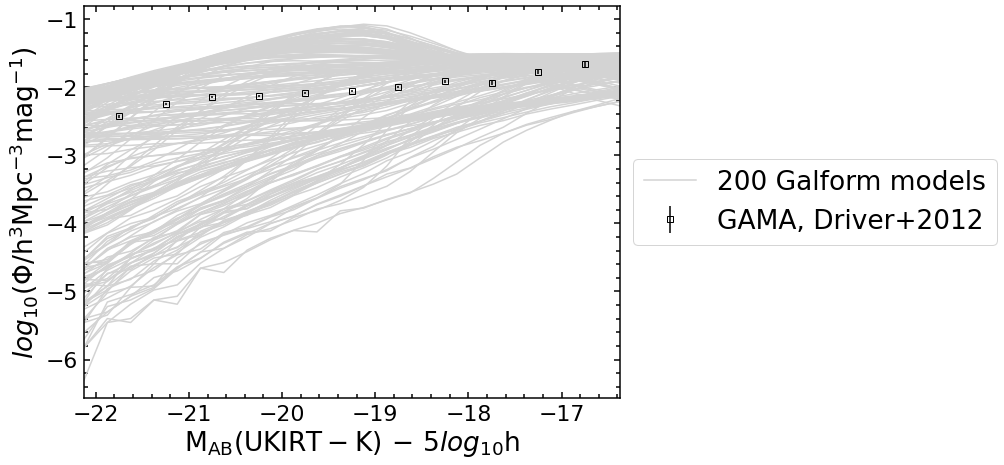

[ 1  3  5  7  9 11 13 15 17 19 21]
[ 2  4  6  8 10 12 14 16 18 20 22]


In [8]:
def chi_square(x_obs,y_obs,eh_obs,el_obs,bins):
    
    # consider only observational data in the range we have predicted
    ind = np.where((x_obs>=np.min(bins))&(x_obs<=np.max(bins)))
    x_obs_f = x_obs[ind]
    y_obs_f = y_obs[ind]
    eh_obs_f = eh_obs[ind]
    el_obs_f = el_obs[ind]
    error_f = error[ind]
    emid_f = (eh_obs_f + el_obs_f)/2

    # find the indexes of the observational data considered
    ind_obs_inf = []
    ind_obs_sup = []
    for i in range(len(x_obs_f)):
        x_obs_g = x_obs_f[i]-bins
        ind_g = np.where(x_obs_g>=0)
        a = np.min(x_obs_g[ind_g])
        ind_obs_inf.append(np.where(x_obs_g == a)[0][0])
        x_obs_g = bins-x_obs_f[i]
        ind_g = np.where(x_obs_g>=0)
        a = np.min(x_obs_g[ind_g])
        ind_obs_sup.append(np.where(x_obs_g == a)[0][0])
    ind_obs_inf = np.array(ind_obs_inf)
    print(ind_obs_inf)
    ind_obs_sup = np.array(ind_obs_sup)
    print(ind_obs_sup)

# K LF z=0

obs_file_K = 'Obs_Data/lfk_z0_driver12.data'
mag, den, err, num = np.loadtxt(obs_file_K,unpack=True)
ind = np.where(den > 0.)
error_K = err[ind]
x_K = mag[ind]
y_K = np.log10(den[ind]/0.5) # Observations are per 0.5 mag
eh_K = np.log10(den[ind]+err[ind]) - np.log10(den[ind])
el_K = np.log10(den[ind]) - np.log10(den[ind]-err[ind])
ind = np.where(np.isinf(el_K) | np.isnan(el_K))
el_K[ind] = 999.
emid_K = (eh_K + el_K)/2

ind = np.where((x_K>=np.min(bins_K[:,0]))&(x_K<=np.max(bins_K[:,0])))
x_K_f = x_K[ind]
y_K_f = y_K[ind]
eh_K_f = eh_K[ind]
el_K_f = el_K[ind]
error_K_f = error_K[ind]
emid_K_f = (eh_K_f + el_K_f)/2

fig = plt.figure(1,figsize=(9.6,7.2))
# 200 models training
for i in range(n_train):
    if i==0:
        ind_0 = np.where(output_train[i,:n_K]!=0)
        ind_0 = ind_0[0]
        plt.plot(bins_K[ind_0,0],output_train[i,ind_0],c='lightgrey',ls='-',label='200 Galform models')  
    else:
        ind_0 = np.where(output_train[i,:n_K]!=0)
        ind_0 = ind_0[0]
        plt.plot(bins_K[ind_0,0],output_train[i,ind_0],c='lightgrey',ls='-')    
plt.errorbar(x_K_f, y_K_f, yerr=[el_K_f,eh_K_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',zorder=200,label="GAMA, Driver+2012")
plt.xlabel("${{\\rm M_{AB}(UKIRT-K)}\, -\, 5log_{10}{\\rm h}}$")
plt.ylabel("$log_{10}(\Phi/ \\rm{h^{3} Mpc^{-3} mag^{-1}})$")
plt.xlim(np.min(bins_K[:,0]),np.max(bins_K[:,0]))
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#plt.savefig('100models_vs_obs.png',facecolor='white', transparent=False)



ind_K_inf = []
ind_K_sup = []
for i in range(len(x_K_f)):
    x_K_g = x_K_f[i]-bins_K[:,0]
    ind_g = np.where(x_K_g>=0)
    a = np.min(x_K_g[ind_g])
    ind_K_inf.append(np.where(x_K_g == a)[0][0])
    x_K_g = bins_K[:,0]-x_K_f[i]
    ind_g = np.where(x_K_g>=0)
    a = np.min(x_K_g[ind_g])
    ind_K_sup.append(np.where(x_K_g == a)[0][0])
ind_K_inf = np.array(ind_K_inf)
print(ind_K_inf)
ind_K_sup = np.array(ind_K_sup)
print(ind_K_sup)

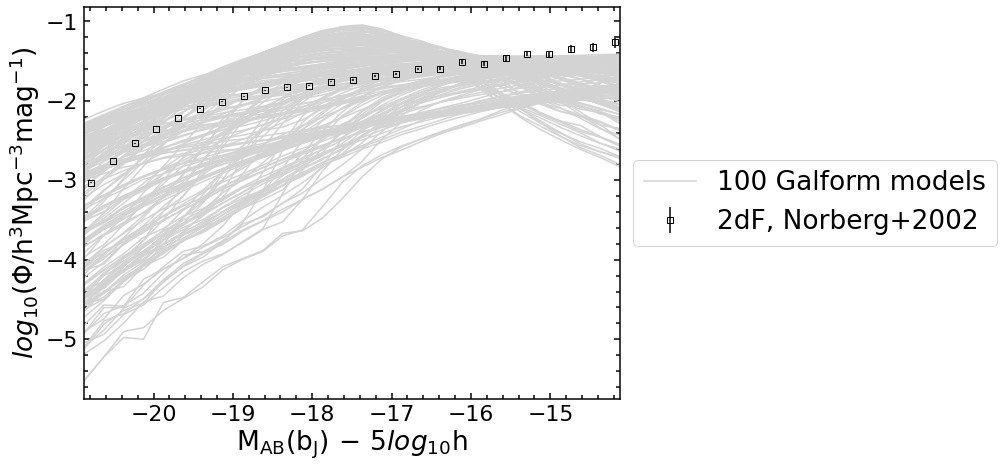

[26 25 24 23 22 21 20 19 17 16 15 14 13 12 11 10  9  8  6  5  4  3  2  1
  0]
[27 26 25 24 23 22 21 20 18 17 16 15 14 13 12 11 10  9  7  6  5  4  3  2
  1]


In [9]:
# bJ LF
obs_file_bJ = 'Obs_Data/lfBJ_norberg02.data'
den, mag, err = np.loadtxt(obs_file_bJ,usecols=[0,1,2],unpack=True)
ind = np.where(den > 0.)
error_bJ = err[ind]
x_bJ = mag[ind]-0.089 # Chenkde to AB
y_bJ = np.log10(den[ind])
e_bJ = err[ind]
eh_bJ = np.log10(den[ind]+e_bJ) - np.log10(den[ind])
el_bJ = np.log10(den[ind]) - np.log10(den[ind]-e_bJ)
ind = np.where(np.isinf(el_bJ) | np.isnan(el_bJ))
el_bJ[ind] = 999.
emid_bJ = (eh_bJ + el_bJ)/2

ind = np.where((x_bJ>=np.min(bins_bJ[:,0]))&(x_bJ<=np.max(bins_bJ[:,0])))
x_bJ_f = x_bJ[ind]
y_bJ_f = y_bJ[ind]
eh_bJ_f = eh_bJ[ind]
el_bJ_f = el_bJ[ind]
error_bJ_f = error_bJ[ind]
emid_bJ_f = (eh_bJ_f + el_bJ_f)/2

fig = plt.figure(1,figsize=(9.6,7.2))
# 200 models training
for i in range(n_train):
    if i==0:
        ind_0 = np.where(output_train[i,n_K:n_K+n_bJ]!=0)
        ind_0 = ind_0[0]
        plt.plot(bins_bJ[ind_0,0],output_train[i,n_K+ind_0],c='lightgrey',ls='-',label='100 Galform models')  
    else:
        ind_0 = np.where(output_train[i,n_K:n_K+n_bJ]!=0)
        ind_0 = ind_0[0]
        plt.plot(bins_bJ[ind_0,0],output_train[i,n_K+ind_0],c='lightgrey',ls='-')    
plt.errorbar(x_bJ_f, y_bJ_f, yerr=[el_bJ_f,eh_bJ_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',zorder=200,label="2dF, Norberg+2002")
plt.xlabel("${{\\rm M_{AB}(b_{J})}\, -\, 5log_{10}{\\rm h}}$")
plt.ylabel("$log_{10}(\Phi/ \\rm{h^{3} Mpc^{-3} mag^{-1}})$")
plt.xlim(np.min(bins_bJ[:,0]),np.max(bins_bJ[:,0]))
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#plt.savefig('100models_vs_obs.png',facecolor='white', transparent=False)



ind_bJ_inf = []
ind_bJ_sup = []
for i in range(len(x_bJ_f)):
    x_bJ_g = x_bJ_f[i]-bins_bJ[:,0]
    ind_g = np.where(x_bJ_g>=0)
    a = np.min(x_bJ_g[ind_g])
    ind_bJ_inf.append(np.where(x_bJ_g == a)[0][0])
    x_bJ_g = bins_bJ[:,0]-x_bJ_f[i]
    ind_g = np.where(x_bJ_g>=0)
    a = np.min(x_bJ_g[ind_g])
    ind_bJ_sup.append(np.where(x_bJ_g == a)[0][0])
ind_bJ_inf = np.array(ind_bJ_inf)
ind_bJ_sup = np.array(ind_bJ_sup)
print(ind_bJ_inf)
print(ind_bJ_sup)

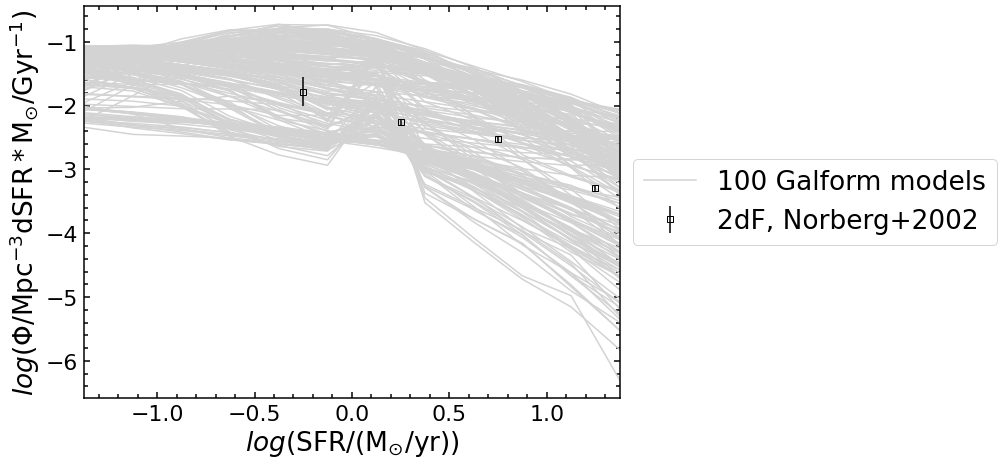

[ 4  6  8 10]
[ 5  7  9 11]


In [10]:
# SFRF
obs_file_s = 'Obs_Data/gruppioni_2015_z0.0-0.3_cha.txt'
lm_l, lm_h, y_s, emid_s = np.loadtxt(obs_file_s,usecols=[0,1,2,3],unpack=True)
x_s = (lm_l+lm_h)/2

ind = np.where((x_s>=np.min(bins_s[:,0]))&(x_s<=np.max(bins_s[:,0])))
x_s_f = x_s[ind]
y_s_f = y_s[ind]
emid_s_f = emid_s[ind]

fig = plt.figure(1,figsize=(9.6,7.2))
# 200 models training
for i in range(n_train):
    if i==0:
        ind_0 = np.where(output_train[i,n_K+n_bJ:n_K+n_bJ+n_s]!=0)
        ind_0 = ind_0[0]
        plt.plot(bins_s[ind_0,0],output_train[i,n_K+n_bJ+ind_0],c='lightgrey',ls='-',label='100 Galform models')  
    else:
        ind_0 = np.where(output_train[i,n_K+n_bJ:n_K+n_bJ+n_s]!=0)
        ind_0 = ind_0[0]
        plt.plot(bins_s[ind_0,0],output_train[i,n_K+n_bJ+ind_0],c='lightgrey',ls='-')    
plt.errorbar(x_s_f, y_s_f, yerr=emid_s_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',zorder=200,label="2dF, Norberg+2002")
plt.xlabel("$log (\\rm SFR /(M_{\odot}/yr))$")
plt.ylabel("${log(\Phi/ \\rm{Mpc^{-3} d{\\rm SFR*M_{\odot}/Gyr^{-1}}}})$")
plt.xlim(np.min(bins_s[:,0]),np.max(bins_s[:,0]))
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#plt.savefig('100models_vs_obs.png',facecolor='white', transparent=False)



ind_s_inf = []
ind_s_sup = []
for i in range(len(x_s_f)):
    x_s_g = x_s_f[i]-bins_s[:,0]
    ind_g = np.where(x_s_g>=0)
    a = np.min(x_s_g[ind_g])
    ind_s_inf.append(np.where(x_s_g == a)[0][0])
    x_s_g = bins_s[:,0]-x_s_f[i]
    ind_g = np.where(x_s_g>=0)
    a = np.min(x_s_g[ind_g])
    ind_s_sup.append(np.where(x_s_g == a)[0][0])
ind_s_inf = np.array(ind_s_inf)
ind_s_sup = np.array(ind_s_sup)
print(ind_s_inf)
print(ind_s_sup)

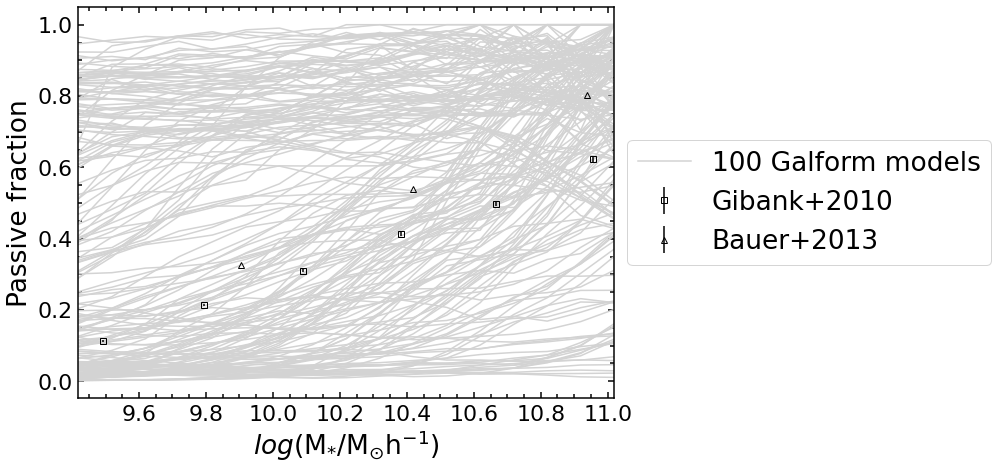

[ 9.49109804  9.79309804 10.09109804 10.38209804 10.66509804 10.95509804
  9.90558115 10.41906615 10.93686515]
[0.00167465 0.00271352 0.00167465 0.00367566 0.00480556 0.00167465
 0.00637271 0.00167465 0.01075543]
[ 0  3  4  6  9  9 12 15 15]
[ 1  4  5  7 10 10 13 16 16]


In [11]:
# passive
obs_file_p1 = 'Obs_Data/z0_gilbank10.txt'
lm, y_p1, emid_p1 = np.loadtxt(obs_file_p1,unpack=True)
ind = np.where(den > 0.)
x_p1 = lm + np.log10(0.7)

ind = np.where((x_p1>=np.min(bins_p[:,0]))&(x_p1<=np.max(bins_p[:,0])))
x_p1_f = x_p1[ind]
y_p1_f = y_p1[ind]
emid_p1_f = emid_p1[ind]

obs_file_p2 = 'Obs_Data/z0_bauer13.txt'
lm, y_p2 = np.loadtxt(obs_file_p2,unpack=True)
x_p2 = lm + np.log10(0.7)
emid_p2 = lm*0. # 0 error CAREFUL!

ind = np.where((x_p2>=np.min(bins_p[:,0]))&(x_p2<=np.max(bins_p[:,0])))
x_p2_f = x_p2[ind]
y_p2_f = y_p2[ind]
emid_p2_f = emid_p2[ind]

fig = plt.figure(1,figsize=(9.6,7.2))
# 200 models training
for i in range(n_train):
    if i==0:
        ind_0 = np.where(output_train[i,n_K+n_bJ+n_s:]!=0)
        ind_0 = ind_0[0]
        plt.plot(bins_p[ind_0,0],output_train[i,n_K+n_bJ+n_s+ind_0],c='lightgrey',ls='-',label='100 Galform models')  
    else:
        ind_0 = np.where(output_train[i,n_K+n_bJ+n_s:]!=0)
        ind_0 = ind_0[0]
        plt.plot(bins_p[ind_0,0],output_train[i,n_K+n_bJ+n_s+ind_0],c='lightgrey',ls='-')    
plt.errorbar(x_p1_f, y_p1_f, yerr=emid_p1_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',zorder=200,label="Gibank+2010")
plt.errorbar(x_p2_f, y_p2_f, yerr=emid_p2_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='^',zorder=200,label="Bauer+2013")
plt.xlabel("$log(\\rm{M_{*}/M_{\odot} h^{-1}})$")
plt.ylabel("Passive fraction")
plt.xlim(np.min(bins_p[:,0]),np.max(bins_p[:,0]))
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#plt.savefig('100models_vs_obs.png',facecolor='white', transparent=False)

# considering both datasets together
x_p_f = np.concatenate((x_p1_f,x_p2_f))
y_p_f = np.concatenate((y_p1_f,y_p2_f))
emid_p_f = np.concatenate((emid_p1_f,emid_p2_f))
for j in range(len(emid_p_f)):
    if emid_p_f[j]==0:
        emid_p_f[j] = np.min(emid_p1_f)
print(x_p_f)
ind_arg = np.argsort(x_p_f)
x_p_f = x_p_f[ind_arg]
y_p_f = y_p_f[ind_arg]
emid_p_f = emid_p_f[ind_arg]
print(emid_p_f)
ind_p_inf = []
ind_p_sup = []
for i in range(len(x_p_f)):
    x_p_g = x_p_f[i]-bins_p[:,0]
    ind_g = np.where(x_p_g>=0)
    a = np.min(x_p_g[ind_g])
    ind_p_inf.append(np.where(x_p_g == a)[0][0])
    x_p_g = bins_p[:,0]-x_p_f[i]
    ind_g = np.where(x_p_g>=0)
    a = np.min(x_p_g[ind_g])
    ind_p_sup.append(np.where(x_p_g == a)[0][0])
ind_p_inf = np.array(ind_p_inf)
ind_p_sup = np.array(ind_p_sup)
print(ind_p_inf)
print(ind_p_sup)

(10000, 81)
(11,)
2310.489228501449
1133.1379071918034
2434.6303102727957
6682.348378405255
1878.101903443913
7922.364790056541
7003.188960678575
16623.575420113943
48544.14447249976
4569.666029546411


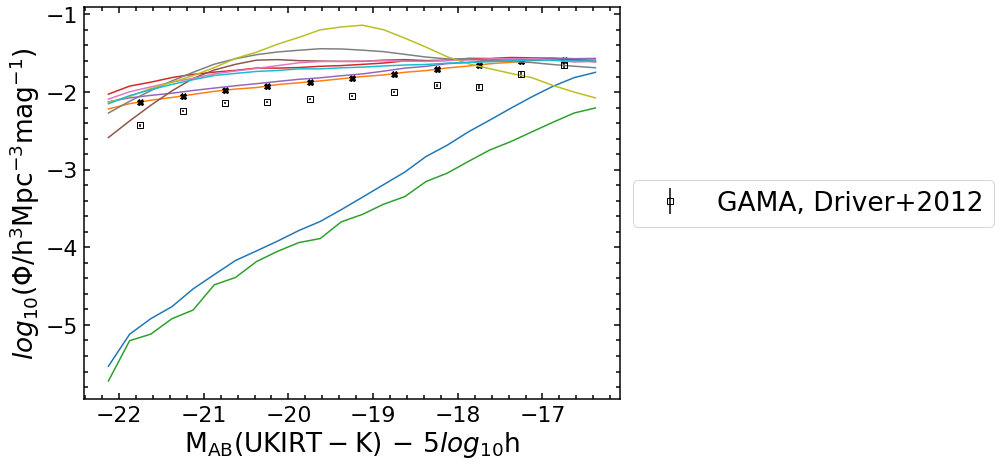

(11,)


In [12]:
# K LF
pre_K = pre[:,:n_K]
print(x_K_f.shape)
chi_K = []
mae_obs_K = []
pre_K_f_1 = []
pre_K_f_2 = []
pre_K_f_3 = []
pre_K_f_4 = []
pre_K_f_5 = []
pre_K_f_6 = []
pre_K_f_7 = []
pre_K_f_8 = []
pre_K_f_9 = []
pre_K_f_10 = []
pre_K_f_11 = []


fig = plt.figure(10,figsize=(9.6,7.2))
for i in range(10000):
    
    m = (pre_K[i,ind_K_sup]-pre_K[i,ind_K_inf])/(bins_K[ind_K_sup,0]-bins_K[ind_K_inf,0])
    n = pre_K[i,ind_K_inf]-m*bins_K[ind_K_inf,0]
    pre_K_f = m*x_K_f + n
    
    pre_K_f_1.append(pre_K_f[0])
    pre_K_f_2.append(pre_K_f[1])
    pre_K_f_3.append(pre_K_f[2])
    pre_K_f_4.append(pre_K_f[3])
    pre_K_f_5.append(pre_K_f[4])
    pre_K_f_6.append(pre_K_f[5])
    pre_K_f_7.append(pre_K_f[6])
    pre_K_f_8.append(pre_K_f[7])
    pre_K_f_9.append(pre_K_f[8])
    pre_K_f_10.append(pre_K_f[9])
    pre_K_f_11.append(pre_K_f[10])
 
    
    # chi square
    chi_K.append(np.sum((10**y_K_f-10**pre_K_f)**2/(error_K_f**2))/len(pre_K_f))
    
    # mae_obs
    mae_obs_K.append(np.sum(np.abs(pre_K_f-y_K_f)/len(pre_K_f)))
    
    #print(pre[i].shape)
    if i<10:
        print(chi_K[-1])
        plt.plot(bins_K[:,0], pre_K[i],'-')
    if i==1: # best fit of 10
        plt.plot(x_K_f, pre_K_f,'kX') # interpolation
plt.errorbar(x_K_f, y_K_f, yerr=[el_K_f,eh_K_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="GAMA, Driver+2012")
plt.xlabel("${{\\rm M_{AB}(UKIRT-K)}\, -\, 5log_{10}{\\rm h}}$")
plt.ylabel("$log_{10}(\Phi/ \\rm{h^{3} Mpc^{-3} mag^{-1}})$")
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    
print(pre_K_f.shape)
chi_K = np.array(chi_K)
mae_obs_K = np.array(mae_obs_K)

pre_K_f_1 = np.array(pre_K_f_1)
pre_K_f_2 = np.array(pre_K_f_2)
pre_K_f_3 = np.array(pre_K_f_3)
pre_K_f_4 = np.array(pre_K_f_4)
pre_K_f_5 = np.array(pre_K_f_5)
pre_K_f_6 = np.array(pre_K_f_6)
pre_K_f_7 = np.array(pre_K_f_7)
pre_K_f_8 = np.array(pre_K_f_8)
pre_K_f_9 = np.array(pre_K_f_9)
pre_K_f_10 = np.array(pre_K_f_10)
pre_K_f_11 = np.array(pre_K_f_11)

(25,)
3479.269245470993
5896.4254228370555
3616.679830161905
17401.810347567283
14957.179963563485
4838.258864692971
7321.690753945906
6470.7584753670635
6515.5080054366235
7406.485816919988


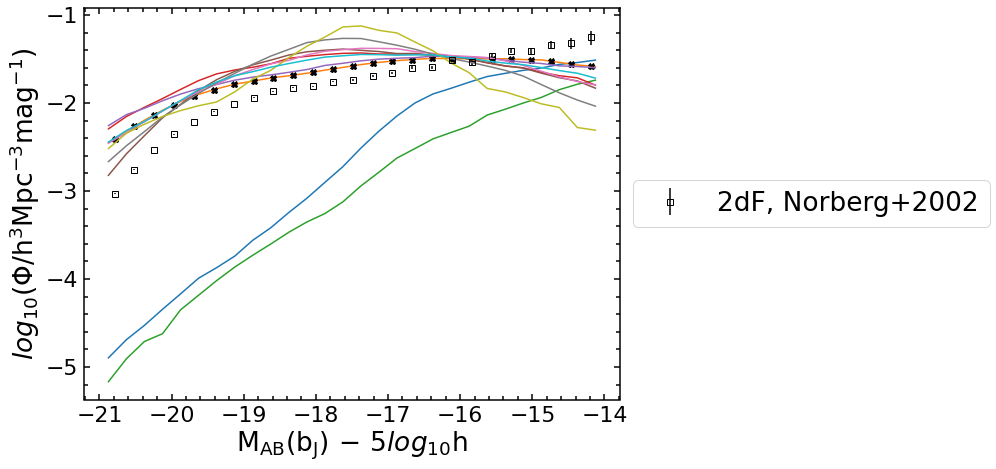

In [13]:
# bJ LF
pre_bJ = pre[:,n_K:n_K+n_bJ]
print(x_bJ_f.shape)
chi_bJ = []
mae_obs_bJ = []
pre_bJ_f_1 = []
pre_bJ_f_2 = []
pre_bJ_f_3 = []
pre_bJ_f_4 = []
pre_bJ_f_5 = []
pre_bJ_f_6 = []
pre_bJ_f_7 = []
pre_bJ_f_8 = []
pre_bJ_f_9 = []
pre_bJ_f_10 = []
pre_bJ_f_11 = []
pre_bJ_f_12 = []
pre_bJ_f_13 = []
pre_bJ_f_14 = []
pre_bJ_f_15 = []
pre_bJ_f_16 = []
pre_bJ_f_17 = []
pre_bJ_f_18 = []
pre_bJ_f_19 = []
pre_bJ_f_20 = []
pre_bJ_f_21 = []
pre_bJ_f_22 = []
pre_bJ_f_23 = []
pre_bJ_f_24 = []
pre_bJ_f_25 = []

fig = plt.figure(10,figsize=(9.6,7.2))
for i in range(10000):
    
    m = (pre_bJ[i,ind_bJ_sup]-pre_bJ[i,ind_bJ_inf])/(bins_bJ[ind_bJ_sup,0]-bins_bJ[ind_bJ_inf,0])
    n = pre_bJ[i,ind_bJ_inf]-m*bins_bJ[ind_bJ_inf,0]
    pre_bJ_f = m*x_bJ_f + n
    
    pre_bJ_f_1.append(pre_bJ_f[0])
    pre_bJ_f_2.append(pre_bJ_f[1])
    pre_bJ_f_3.append(pre_bJ_f[2])
    pre_bJ_f_4.append(pre_bJ_f[3])
    pre_bJ_f_5.append(pre_bJ_f[4])
    pre_bJ_f_6.append(pre_bJ_f[5])
    pre_bJ_f_7.append(pre_bJ_f[6])
    pre_bJ_f_8.append(pre_bJ_f[7])
    pre_bJ_f_9.append(pre_bJ_f[8])
    pre_bJ_f_10.append(pre_bJ_f[9])
    pre_bJ_f_11.append(pre_bJ_f[10])
    pre_bJ_f_12.append(pre_bJ_f[11])
    pre_bJ_f_13.append(pre_bJ_f[12])
    pre_bJ_f_14.append(pre_bJ_f[13])
    pre_bJ_f_15.append(pre_bJ_f[14])
    pre_bJ_f_16.append(pre_bJ_f[15])
    pre_bJ_f_17.append(pre_bJ_f[16])
    pre_bJ_f_18.append(pre_bJ_f[17])
    pre_bJ_f_19.append(pre_bJ_f[18])
    pre_bJ_f_20.append(pre_bJ_f[19])
    pre_bJ_f_21.append(pre_bJ_f[20])
    pre_bJ_f_22.append(pre_bJ_f[21])
    pre_bJ_f_23.append(pre_bJ_f[22])
    pre_bJ_f_24.append(pre_bJ_f[23])
    pre_bJ_f_25.append(pre_bJ_f[24])
 
    
    # chi square
    chi_bJ.append(np.sum((10**y_bJ_f-10**pre_bJ_f)**2/(error_bJ_f**2))/len(pre_bJ_f))
    
    # mae_obs
    mae_obs_bJ.append(np.sum(np.abs(pre_bJ_f-y_bJ_f)/len(pre_bJ_f)))
    
    #print(pre[i].shape)
    if i<10:
        print(chi_bJ[-1])
        plt.plot(bins_bJ[:,0], pre_bJ[i],'-')
    if i==1: # best fit of 10
        plt.plot(x_bJ_f, pre_bJ_f,'kX') # interpolation
plt.errorbar(x_bJ_f, y_bJ_f, yerr=[el_bJ_f,eh_bJ_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="2dF, Norberg+2002")
plt.xlabel("${{\\rm M_{AB}(b_{J})}\, -\, 5log_{10}{\\rm h}}$")
plt.ylabel("$log_{10}(\Phi/ \\rm{h^{3} Mpc^{-3} mag^{-1}})$")
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    
chi_bJ = np.array(chi_bJ)
mae_obs_bJ = np.array(mae_obs_bJ)

pre_bJ_f_1 = np.array(pre_bJ_f_1)
pre_bJ_f_2 = np.array(pre_bJ_f_2)
pre_bJ_f_3 = np.array(pre_bJ_f_3)
pre_bJ_f_4 = np.array(pre_bJ_f_4)
pre_bJ_f_5 = np.array(pre_bJ_f_5)
pre_bJ_f_6 = np.array(pre_bJ_f_6)
pre_bJ_f_7 = np.array(pre_bJ_f_7)
pre_bJ_f_8 = np.array(pre_bJ_f_8)
pre_bJ_f_9 = np.array(pre_bJ_f_9)
pre_bJ_f_10 = np.array(pre_bJ_f_10)
pre_bJ_f_11 = np.array(pre_bJ_f_11)
pre_bJ_f_12 = np.array(pre_bJ_f_12)
pre_bJ_f_13 = np.array(pre_bJ_f_13)
pre_bJ_f_14 = np.array(pre_bJ_f_14)
pre_bJ_f_15 = np.array(pre_bJ_f_15)
pre_bJ_f_16 = np.array(pre_bJ_f_16)
pre_bJ_f_17 = np.array(pre_bJ_f_17)
pre_bJ_f_18 = np.array(pre_bJ_f_18)
pre_bJ_f_19 = np.array(pre_bJ_f_19)
pre_bJ_f_20 = np.array(pre_bJ_f_20)
pre_bJ_f_21 = np.array(pre_bJ_f_21)
pre_bJ_f_22 = np.array(pre_bJ_f_22)
pre_bJ_f_23 = np.array(pre_bJ_f_23)
pre_bJ_f_24 = np.array(pre_bJ_f_24)
pre_bJ_f_25 = np.array(pre_bJ_f_25)

(4,)
1.9741471312476158e-05
0.00016953267227148828
1.5609880486676437e-05
0.0005751372918899278
0.0003191973668213697
0.00037043542185532196
0.0006990606350510153
0.0011169301647491713
0.003676556392811203
0.0005548039892193019


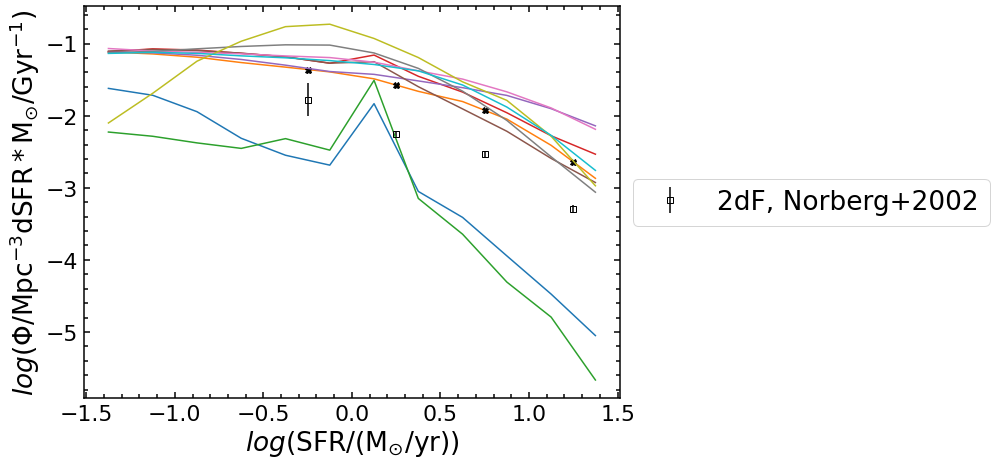

In [14]:
# SFRF
pre_s = pre[:,n_K+n_bJ:n_K+n_bJ+n_s]
print(x_s_f.shape)
chi_s = []
mae_obs_s = []
pre_s_f_1 = []
pre_s_f_2 = []
pre_s_f_3 = []
pre_s_f_4 = []

fig = plt.figure(10,figsize=(9.6,7.2))
for i in range(10000):
    
    m = (pre_s[i,ind_s_sup]-pre_s[i,ind_s_inf])/(bins_s[ind_s_sup,0]-bins_s[ind_s_inf,0])
    n = pre_s[i,ind_s_inf]-m*bins_s[ind_s_inf,0]
    pre_s_f = m*x_s_f + n
    
    pre_s_f_1.append(pre_s_f[0])
    pre_s_f_2.append(pre_s_f[1])
    pre_s_f_3.append(pre_s_f[2])
    pre_s_f_4.append(pre_s_f[3])
    
    # chi square
    chi_s.append(np.sum((10**y_s_f-10**pre_s_f)**2/((10**emid_s_f)**2))/len(pre_s_f))
    
    # mae_obs
    mae_obs_s.append(np.sum(np.abs(pre_s_f-y_s_f)/len(pre_s_f)))
    
    #print(pre[i].shape)
    if i<10:
        print(chi_s[-1])
        plt.plot(bins_s[:,0], pre_s[i],'-')
    if i==1: # best fit of 10
        plt.plot(x_s_f, pre_s_f,'kX') # interpolation
plt.errorbar(x_s_f, y_s_f, yerr=emid_s_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="2dF, Norberg+2002")
plt.xlabel("$log (\\rm SFR /(M_{\odot}/yr))$")
plt.ylabel("${log(\Phi/ \\rm{Mpc^{-3} d{\\rm SFR*M_{\odot}/Gyr^{-1}}}})$")
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    
chi_s = np.array(chi_s)
mae_obs_s = np.array(mae_obs_s)

pre_s_f_1 = np.array(pre_s_f_1)
pre_s_f_2 = np.array(pre_s_f_2)
pre_s_f_3 = np.array(pre_s_f_3)
pre_s_f_4 = np.array(pre_s_f_4)

(9,)
[0.11334535 0.21373188 0.32636    0.3107402  0.413446   0.539749
 0.49727569 0.803347   0.62214378]
0.32636

0.07601134980738511 0.11535238312578622 0.18905393413075267
18.417287332102873
1.6665755115610699
18.582720597835532
1.8182937405463564
10.852633761836168
1.012085748433143
9.267347052984569
1.2382063398168177
2.0650348909871803
3.8255344728926985


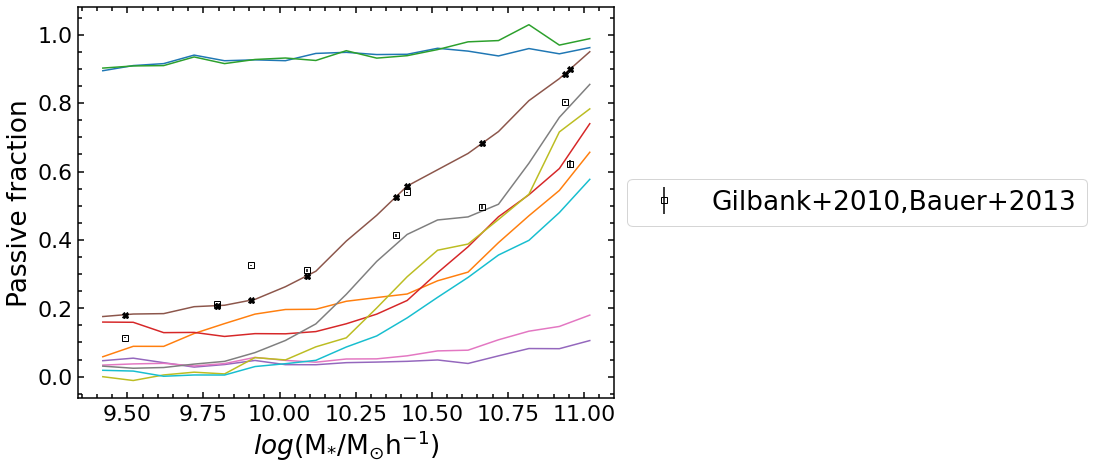

In [15]:
# passive
pre_p = pre[:,n_K+n_bJ+n_s:]
print(x_p_f.shape)
chi_p = []
mae_obs_p = []
pre_p_f_1 = []
pre_p_f_2 = []
pre_p_f_3 = []
pre_p_f_4 = []
pre_p_f_5 = []
pre_p_f_6 = []
pre_p_f_7 = []
pre_p_f_8 = []
pre_p_f_9 = []

# linear interpolation for error: 2,5 and 7 points obs data
print(y_p_f)
print(y_p_f[2])
print()
e2 = y_p_f[2]-((y_p_f[3]-y_p_f[1])/(x_p_f[3]-x_p_f[1])*(x_p_f[2]-x_p_f[1]) + y_p_f[1])
e5 = y_p_f[5]-((y_p_f[6]-y_p_f[4])/(x_p_f[6]-x_p_f[4])*(x_p_f[5]-x_p_f[4]) + y_p_f[4])
e7 = y_p_f[7]-((y_p_f[8]-y_p_f[6])/(x_p_f[8]-x_p_f[6])*(x_p_f[7]-x_p_f[6]) + y_p_f[6])
print(e2,e5,e7)
e_bauer = np.mean([e2,e5,e7])

fig = plt.figure(10,figsize=(9.6,7.2))
for i in range(10000):
    
    m = (pre_p[i,ind_p_sup]-pre_p[i,ind_p_inf])/(bins_p[ind_p_sup,0]-bins_p[ind_p_inf,0])
    n = pre_p[i,ind_p_inf]-m*bins_p[ind_p_inf,0]
    pre_p_f = m*x_p_f + n
    
    pre_p_f_1.append(pre_p_f[0])
    pre_p_f_2.append(pre_p_f[1])
    pre_p_f_3.append(pre_p_f[2])
    pre_p_f_4.append(pre_p_f[3])
    pre_p_f_5.append(pre_p_f[4])
    pre_p_f_6.append(pre_p_f[5])
    pre_p_f_7.append(pre_p_f[6])
    pre_p_f_8.append(pre_p_f[7])
    pre_p_f_9.append(pre_p_f[8])
 
    
    # chi square
    chi_p.append(np.sum((y_p_f-pre_p_f)**2/(e_bauer**2))/len(pre_p_f))
    
    # mae_obs
    mae_obs_p.append(np.sum(np.abs(pre_p_f-y_p_f)/len(pre_p_f)))
    
    #print(pre[i].shape)
    if i<10:
        print(chi_p[-1])
        plt.plot(bins_p[:,0], pre_p[i],'-')
    if i==5: # best fit of 10
        plt.plot(x_p_f, pre_p_f,'kX') # interpolation
plt.errorbar(x_p_f, y_p_f, yerr=emid_p_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="Gilbank+2010,Bauer+2013")
plt.xlabel("$log(\\rm{M_{*}/M_{\odot} h^{-1}})$")
plt.ylabel("Passive fraction")
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    
chi_p = np.array(chi_p)
mae_obs_p = np.array(mae_obs_p)

pre_p_f_1 = np.array(pre_p_f_1)
pre_p_f_2 = np.array(pre_p_f_2)
pre_p_f_3 = np.array(pre_p_f_3)
pre_p_f_4 = np.array(pre_p_f_4)
pre_p_f_5 = np.array(pre_p_f_5)
pre_p_f_6 = np.array(pre_p_f_6)
pre_p_f_7 = np.array(pre_p_f_7)
pre_p_f_8 = np.array(pre_p_f_8)
pre_p_f_9 = np.array(pre_p_f_9)

43.804017125343485
18.848016950023375
6.575581717652934e-08
0.27022769208084
36.39513601989329


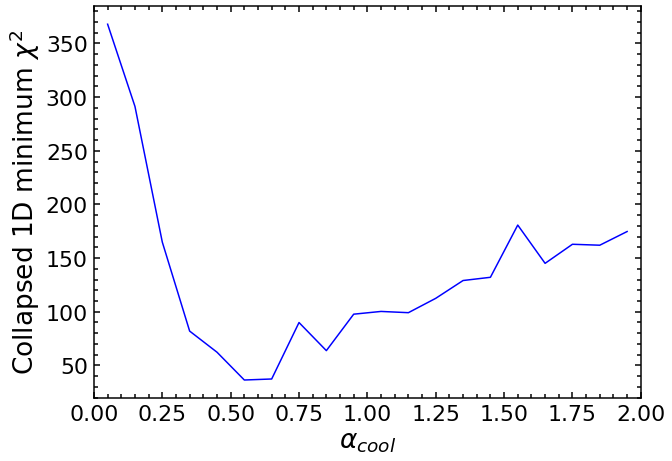

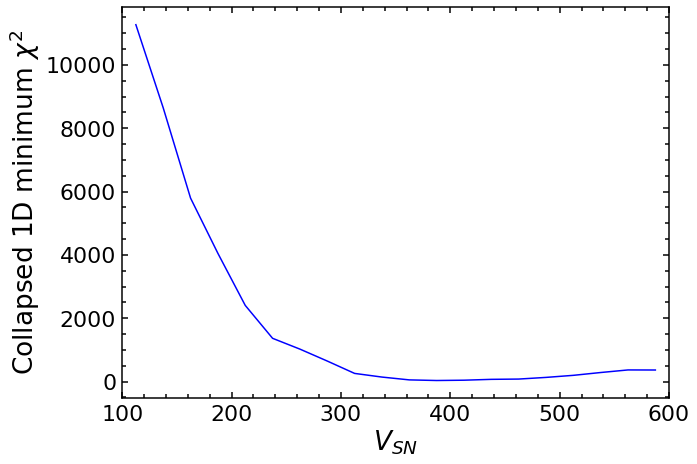

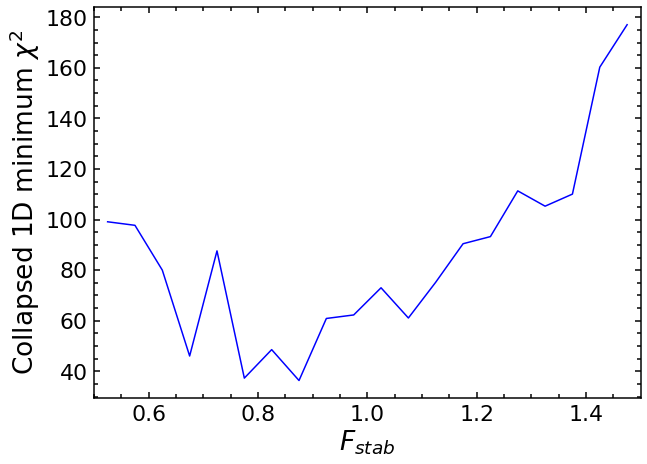

(array([3799]),)
(10000, 3)
[[0.55569524]]
[[385.69296]]
[[0.8836033]]
(10000,)
(10000,)
(10000,)
(10000,)
-2.4207643270492554


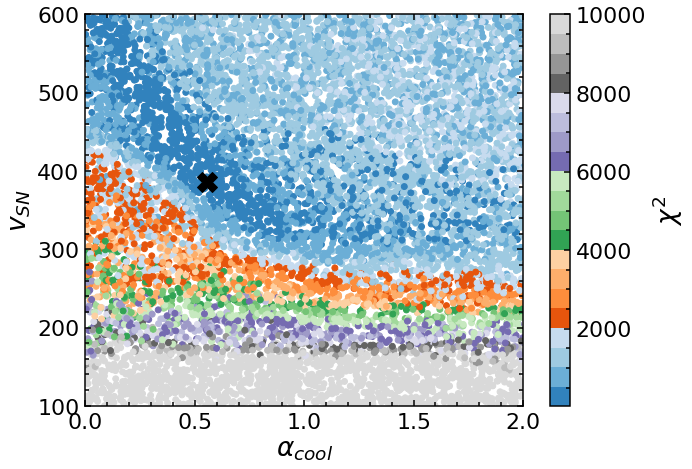

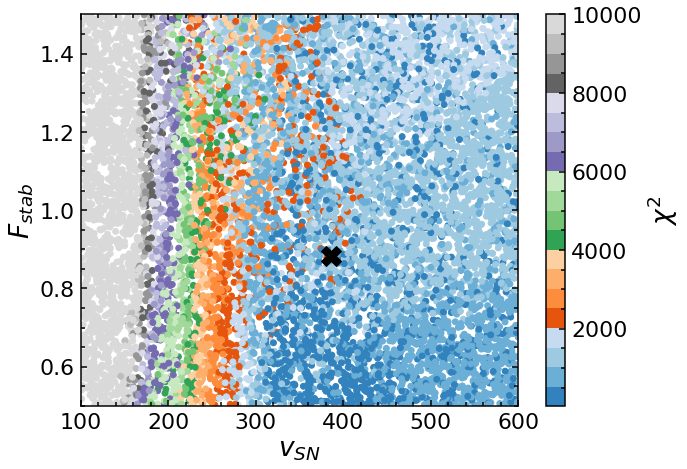

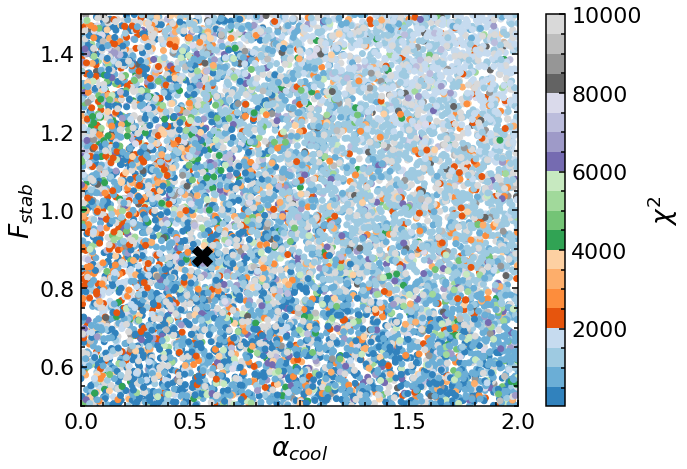

In [16]:
import matplotlib.gridspec as gridspec

# total chi
#w_K = 1/4
#w_bJ = 1/4
#w_s = 1/4
#w_p = 1/4
w_K = 4/15
w_bJ = 4/15
w_s = 4/15
w_p = 1/5
chi = chi_K*w_K + chi_bJ*w_bJ + chi_s*w_s + chi_p*w_p
print(np.min(chi_K))
print(np.min(chi_bJ))
print(np.min(chi_s))
print(np.min(chi_p))
print(np.min(chi))

#collapsed histograms
acool_l = 0
acool_u = 2
dacool = 0.1
nacool = int((acool_u-acool_l)/dacool)
edges_acool = np.linspace(acool_l,acool_u,nacool+1)
centers_acool = (edges_acool[0:-1]+edges_acool[1:])/2
ind = np.digitize(lhd[:,0],edges_acool)
avg_acool = []
for i in range(1,np.amax(ind)+1):
    pos = np.where(np.array(ind)==i)
    avg_acool.append(np.min(chi[pos]))
avg_acool = np.array(avg_acool)
plt.rcParams.update({'font.size': 22})
fig = plt.figure(0,figsize=(9.8,7.2))
plt.plot(centers_acool,avg_acool,'-b',markersize=20)
plt.xlabel(r'$\alpha_{cool}$')
plt.ylabel(r'Collapsed 1D minimum $\chi^{2}$')
plt.xlim(0,2)
plt.show()

#plt.savefig('mlh_5000models_bestfit.png',facecolor='white', transparent=False)
vSN_l = 100
vSN_u = 600
dvSN = 25
nvSN = int((vSN_u-vSN_l)/dvSN)
edges_vSN = np.linspace(vSN_l,vSN_u,nvSN+1)
centers_vSN = (edges_vSN[0:-1]+edges_vSN[1:])/2
ind = np.digitize(lhd[:,1],edges_vSN)
avg_vSN = []
for i in range(1,np.amax(ind)+1):
    pos = np.where(np.array(ind)==i)
    avg_vSN.append(np.min(chi[pos]))
avg_vSN = np.array(avg_vSN)
plt.rcParams.update({'font.size': 22})
fig = plt.figure(0,figsize=(9.8,7.2))
plt.plot(centers_vSN,avg_vSN,'-b',markersize=20)
plt.xlabel('$V_{SN}$')
plt.ylabel(r'Collapsed 1D minimum $\chi^{2}$')
plt.xlim(100,600)
plt.show()
#plt.savefig('mlh_5000models_bestfit.png',facecolor='white', transparent=False)

fstab_l = 0.5
fstab_u = 1.5
dfstab = 0.05
nfstab = int((fstab_u-fstab_l)/dfstab)
edges_fstab = np.linspace(fstab_l,fstab_u,nfstab+1)
centers_fstab = (edges_fstab[0:-1]+edges_fstab[1:])/2
ind = np.digitize(lhd[:,2],edges_fstab)
avg_fstab = []
for i in range(1,np.amax(ind)+1):
    pos = np.where(np.array(ind)==i)
    avg_fstab.append(np.min(chi[pos]))
avg_fstab = np.array(avg_fstab)
plt.rcParams.update({'font.size': 22})
fig = plt.figure(0,figsize=(9.8,7.2))
plt.plot(centers_fstab,avg_fstab,'-b',markersize=20)
plt.xlabel('$F_{stab}$')
plt.ylabel(r'Collapsed 1D minimum $\chi^{2}$')
plt.xlim(0.5,1.5)
plt.show()
#plt.savefig('mlh_5000models_bestfit.png',facecolor='white', transparent=False)
    

i_best = np.where(chi == np.min(chi))
print(i_best)
print(np.shape(z))
alpha_cool_bestfit = z[i_best,0]
v_SN_bestfit = z[i_best,1]
F_stab_bestfit = z[i_best,2]
print(alpha_cool_bestfit)
print(v_SN_bestfit)
print(F_stab_bestfit)
print(pre_K_f_1.shape)
print(pre_bJ_f_1.shape)
print(pre_s_f_1.shape)
print(pre_p_f_1.shape)
print(pre_K_f_1[i_best][0])
pre_K_f_array = [pre_K_f_1[i_best][0],pre_K_f_2[i_best][0],pre_K_f_3[i_best][0],pre_K_f_4[i_best][0],pre_K_f_5[i_best][0],pre_K_f_6[i_best][0],pre_K_f_7[i_best][0],pre_K_f_8[i_best][0],pre_K_f_9[i_best][0],pre_K_f_10[i_best][0],pre_K_f_11[i_best][0]]
pre_bJ_f_array = [pre_bJ_f_1[i_best][0],pre_bJ_f_2[i_best][0],pre_bJ_f_3[i_best][0],pre_bJ_f_4[i_best][0],pre_bJ_f_5[i_best][0],pre_bJ_f_6[i_best][0],pre_bJ_f_7[i_best][0],pre_bJ_f_8[i_best][0],pre_bJ_f_9[i_best][0],pre_bJ_f_10[i_best][0],pre_bJ_f_11[i_best][0],pre_bJ_f_12[i_best][0],pre_bJ_f_13[i_best][0],pre_bJ_f_14[i_best][0],pre_bJ_f_15[i_best][0],pre_bJ_f_16[i_best][0],pre_bJ_f_17[i_best][0],pre_bJ_f_18[i_best][0],pre_bJ_f_19[i_best][0],pre_bJ_f_20[i_best][0],pre_bJ_f_21[i_best][0],pre_bJ_f_22[i_best][0],pre_bJ_f_23[i_best][0],pre_bJ_f_24[i_best][0],pre_bJ_f_25[i_best][0]]
pre_s_f_array = [pre_s_f_1[i_best][0],pre_s_f_2[i_best][0],pre_s_f_3[i_best][0],pre_s_f_4[i_best][0]]
pre_p_f_array = [pre_p_f_1[i_best][0],pre_p_f_2[i_best][0],pre_p_f_3[i_best][0],pre_p_f_4[i_best][0],pre_p_f_5[i_best][0],pre_p_f_6[i_best][0],pre_p_f_7[i_best][0],pre_p_f_8[i_best][0],pre_p_f_9[i_best][0]]

plt.rcParams.update({'font.size': 22})
fig = plt.figure(0,figsize=(9.8,7.2))
cm = plt.cm.get_cmap('tab20c')
#sc = plt.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=np.max(chi), s=35, cmap=cm)
sc = plt.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=1e4, s=35, cmap=cm)
plt.plot(alpha_cool_bestfit,v_SN_bestfit,'kX',markersize=20)
plt.xlabel(r'$\alpha_{cool}$')
plt.ylabel('$v_{SN}$')
plt.xlim(0,2)
plt.ylim(100,600)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\chi^{2}$')
plt.show()
#plt.savefig('mlh_5000models_bestfit.png',facecolor='white', transparent=False)

plt.rcParams.update({'font.size': 22})
fig = plt.figure(0,figsize=(9.8,7.2))
cm = plt.cm.get_cmap('tab20c')
#sc = plt.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=np.max(chi), s=35, cmap=cm)
sc = plt.scatter(z[:,1], z[:,2], c=chi, vmin=np.min(chi), vmax=1e4, s=35, cmap=cm)
plt.plot(v_SN_bestfit,F_stab_bestfit,'kX',markersize=20)
plt.xlabel('$v_{SN}$')
plt.ylabel('$F_{stab}$')
plt.xlim(100,600)
plt.ylim(0.5,1.5)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\chi^{2}$')
plt.show()
#plt.savefig('mlh_5000models_bestfit.png',facecolor='white', transparent=False)

plt.rcParams.update({'font.size': 22})
fig = plt.figure(0,figsize=(9.8,7.2))
cm = plt.cm.get_cmap('tab20c')
#sc = plt.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=np.max(chi), s=35, cmap=cm)
sc = plt.scatter(z[:,0], z[:,2], c=chi, vmin=np.min(chi), vmax=1e4, s=35, cmap=cm)
plt.plot(alpha_cool_bestfit,F_stab_bestfit,'kX',markersize=20)
plt.xlabel(r'$\alpha_{cool}$')
plt.ylabel('$F_{stab}$')
plt.xlim(0,2)
plt.ylim(0.5,1.5)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\chi^{2}$')
plt.show()
#plt.savefig('mlh_5000models_bestfit.png',facecolor='white', transparent=False)

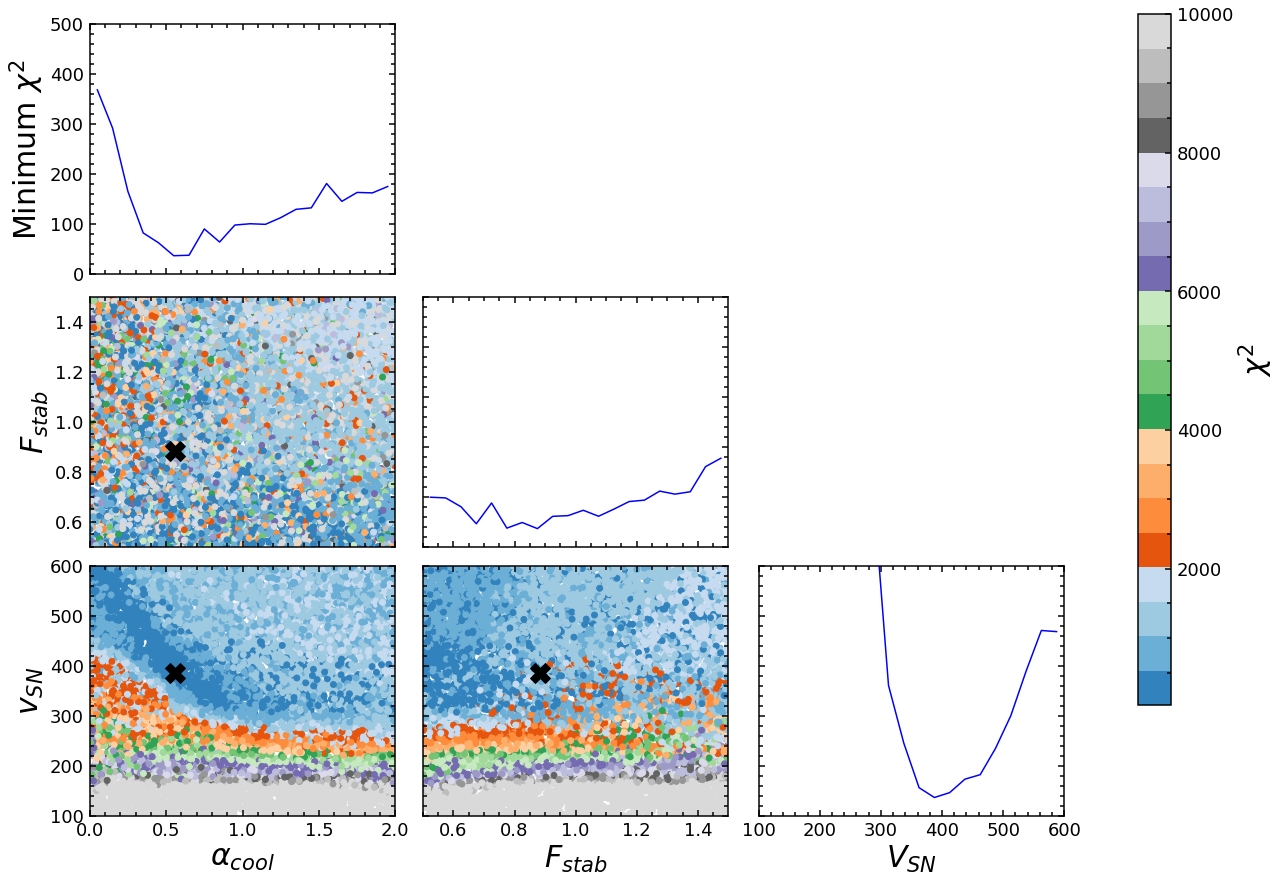

In [24]:
fig = plt.figure(constrained_layout=True,figsize=(15,12))
gs = fig.add_gridspec(3, 3)

plt.rcParams.update({'font.size': 30})
m = 18
l = 30
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

ax00 = fig.add_subplot(gs[0,0])
plt.rcParams.update({'font.size': 15})
ax00.plot(centers_acool,avg_acool,'-b',markersize=20)
ax00.set_ylabel(r'Minimum $\chi^{2}$',fontsize=l)
ax00.set_xlim(0,2)
ax00.set_ylim(0,500)

ax10 = fig.add_subplot(gs[1,0])
cm = plt.cm.get_cmap('tab20c')
#sc = plt.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=np.max(chi), s=35, cmap=cm)
sc = ax10.scatter(z[:,0], z[:,2], c=chi, vmin=np.min(chi), vmax=1e4, s=35, cmap=cm)
ax10.plot(alpha_cool_bestfit,F_stab_bestfit,'kX',markersize=20)
ax10.set_ylabel('$F_{stab}$',fontsize=l)
ax10.set_xlim(0,2)
ax10.set_ylim(0.5,1.5)
#cbar = plt.colorbar(sc)
#cbar.set_label(r'$\chi^{2}$')

ax20 = fig.add_subplot(gs[2,0])
cm = plt.cm.get_cmap('tab20c')
#sc = plt.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=np.max(chi), s=35, cmap=cm)
sc = ax20.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=1e4, s=35, cmap=cm)
ax20.plot(alpha_cool_bestfit,v_SN_bestfit,'kX',markersize=20)
ax20.set_xlabel(r'$\alpha_{cool}$',fontsize=l)
ax20.set_ylabel('$v_{SN}$',fontsize=l)
ax20.set_xlim(0,2)
ax20.set_ylim(100,600)
#cbar = plt.colorbar(sc)
#cbar.set_label(r'$\chi^{2}$')

ax11 = fig.add_subplot(gs[1,1])
ax11.plot(centers_fstab,avg_fstab,'-b',markersize=20)
#ax11.set_ylabel(r'Minimum $\chi^{2}$')
ax11.set_xlim(0.5,1.5)
ax11.set_ylim(0,500)

ax21 = fig.add_subplot(gs[2,1])
cm = plt.cm.get_cmap('tab20c')
#sc = plt.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=np.max(chi), s=35, cmap=cm)
sc = ax21.scatter(z[:,2], z[:,1], c=chi, vmin=np.min(chi), vmax=1e4, s=35, cmap=cm)
ax21.plot(F_stab_bestfit,v_SN_bestfit,'kX',markersize=20)
ax21.set_xlabel('$F_{stab}$',fontsize=l)
ax21.set_ylim(100,600)
ax21.set_xlim(0.5,1.5)

#cbar = plt.colorbar(sc)
#cbar.set_label(r'$\chi^{2}$',fontsize=l)
#box = ax.get_position()
#ax22.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax22.set_box_aspect(1)
# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=l)
#cbar_ax = fig.add_axes([0.15, 1.05, 0.7, 0.03])
#c = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
#c.set_label(r'$\chi^{2}$',fontsize=l)
cbar_ax = fig.add_axes([1.05, 0.1, 0.03, 0.8])
c = fig.colorbar(sc, cax=cbar_ax)
c.set_label(r'$\chi^{2}$',fontsize=l)

ax22 = fig.add_subplot(gs[2,2])
ax22.plot(centers_vSN,avg_vSN,'-b',markersize=20)
ax22.set_xlabel('$V_{SN}$',fontsize=l)
ax22.set_xlim(100,600)
ax22.set_ylim(0,500)

ax11.tick_params('y', labelleft=False)
ax21.tick_params('y', labelleft=False)
ax22.tick_params('y', labelleft=False)
ax00.tick_params('x', labelbottom=False)
ax10.tick_params('x', labelbottom=False)
ax11.tick_params('x', labelbottom=False)
#ax11.yaxis.set_label_position("right")
#ax11.yaxis.tick_right()
#ax22.yaxis.set_label_position("right")
#ax22.yaxis.tick_right()
#plt.show()
plt.savefig('paramspace_elliott.png',facecolor='white', transparent=False)
plt.savefig('paramspace_elliott.svg',facecolor='white', transparent=False)

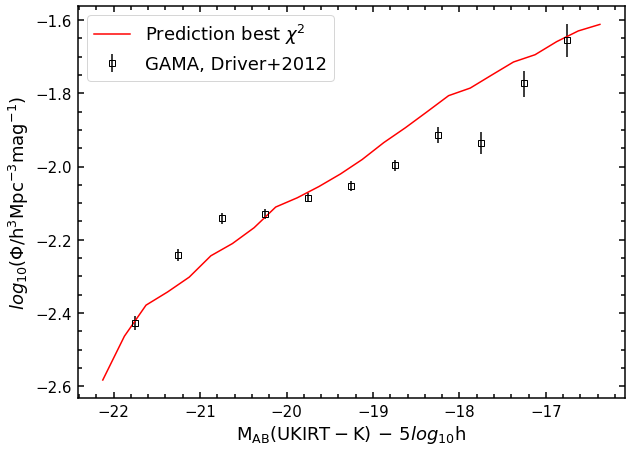

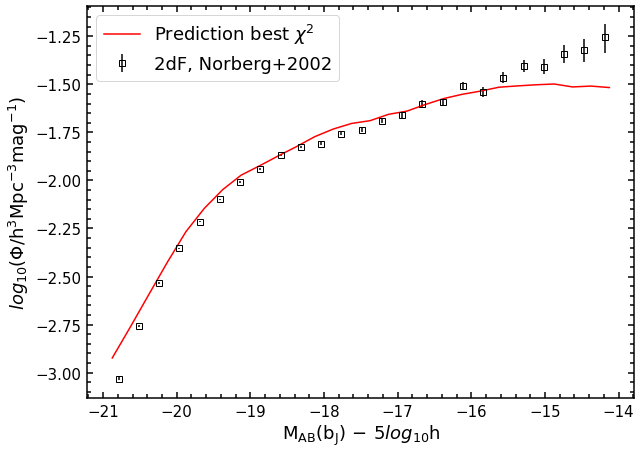

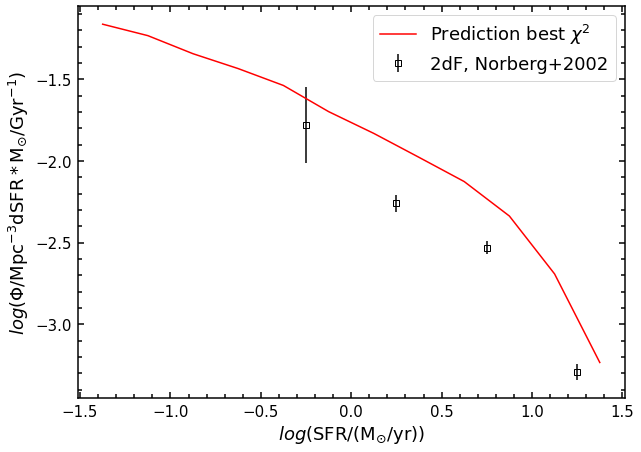

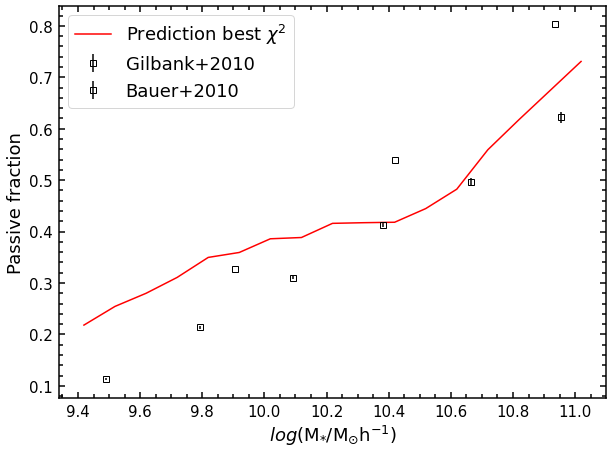

In [43]:
# upload best fit results
#bestfit = np.loadtxt('output_onlydata_bestfit.dat')
#bestfit_r = bestfit[ind_train]
#m_bestfit = (bestfit_r[ind_sup]-bestfit_r[ind_inf])/(xmf_f[ind_sup]-xmf_f[ind_inf])
#n_bestfit = bestfit_r[ind_inf]-m_bestfit*xmf_f[ind_inf]
#bestfit_f = m_bestfit*m_center_f + n_bestfit

fig = plt.figure(2,figsize=(9.8,7.2))
plt.errorbar(x_K_f, y_K_f, yerr=[el_K_f,eh_K_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="GAMA, Driver+2012")
plt.plot(bins_K[:,0], pre_K[i_best][0],'-r',label=r'Prediction best $\chi^{2}$')
#plt.plot(xmf_f, bestfit_r,'-b',label=r'Galform best $\chi^{2}$')
plt.xlabel("${{\\rm M_{AB}(UKIRT-K)}\, -\, 5log_{10}{\\rm h}}$")
plt.ylabel("$log_{10}(\Phi/ \\rm{h^{3} Mpc^{-3} mag^{-1}})$")
plt.legend()
plt.show()

fig = plt.figure(2,figsize=(9.8,7.2))
plt.errorbar(x_bJ_f, y_bJ_f, yerr=[el_bJ_f,eh_bJ_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="2dF, Norberg+2002")
plt.plot(bins_bJ[:,0], pre_bJ[i_best][0],'-r',label=r'Prediction best $\chi^{2}$')
#plt.plot(xmf_f, bestfit_r,'-b',label=r'Galform best $\chi^{2}$')
plt.xlabel("${{\\rm M_{AB}(b_{J})}\, -\, 5log_{10}{\\rm h}}$")
plt.ylabel("$log_{10}(\Phi/ \\rm{h^{3} Mpc^{-3} mag^{-1}})$")
plt.legend()
plt.show()

fig = plt.figure(100,figsize=(9.8,7.2))
plt.errorbar(x_s_f, y_s_f, yerr=emid_s_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="2dF, Norberg+2002")
plt.plot(bins_s[:,0], pre_s[i_best][0],'-r',label=r'Prediction best $\chi^{2}$')
#plt.plot(xmf_f, bestfit_r,'-b',label=r'Galform best $\chi^{2}$')
plt.xlabel("$log (\\rm SFR /(M_{\odot}/yr))$")
plt.ylabel("${log(\Phi/ \\rm{Mpc^{-3} d{\\rm SFR*M_{\odot}/Gyr^{-1}}}})$")
plt.legend()
plt.show()

fig = plt.figure(2,figsize=(9.8,7.2))
plt.errorbar(x_p1_f, y_p1_f, yerr=emid_p1_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="Gilbank+2010")
plt.errorbar(x_p2_f, y_p2_f, yerr=emid_p2_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="Bauer+2010")
plt.plot(bins_p[:,0], pre_p[i_best][0],'-r',label=r'Prediction best $\chi^{2}$')
#plt.plot(xmf_f, bestfit_r,'-b',label=r'Galform best $\chi^{2}$')
plt.xlabel("$log(\\rm{M_{*}/M_{\odot} h^{-1}})$")
plt.ylabel("Passive fraction")
plt.legend()
plt.show()

In [44]:
print('{0:.16f}'.format(alpha_cool_bestfit[0][0]))
print('{0:.16f}'.format(v_SN_bestfit[0][0]))
print('{0:.16f}'.format(F_stab_bestfit[0][0]))

0.5556952357292175
385.6929626464843750
0.8836032748222351


In [45]:
# upload best fit results
A = np.loadtxt('output_onlydata_K_bestfit.dat')
bestfit_K = A[2,rm_K:]
print(bestfit_K.shape)
m_bestfit_K = (bestfit_K[ind_K_sup]-bestfit_K[ind_K_inf])/(bins_K[ind_K_sup,0]-bins_K[ind_K_inf,0])
n_bestfit_K = bestfit_K[ind_K_inf]-m_bestfit_K*bins_K[ind_K_inf,0]
bestfit_K_f = m_bestfit_K*x_K_f + n_bestfit_K
# upload best fit results
A = np.loadtxt('output_onlydata_bJ_bestfit.dat')
bestfit_bJ = A[2,rm_bJ:]
print(bestfit_bJ.shape)
m_bestfit_bJ = (bestfit_bJ[ind_bJ_sup]-bestfit_bJ[ind_bJ_inf])/(bins_bJ[ind_bJ_sup,0]-bins_bJ[ind_bJ_inf,0])
n_bestfit_bJ = bestfit_bJ[ind_bJ_inf]-m_bestfit_bJ*bins_bJ[ind_bJ_inf,0]
bestfit_bJ_f = m_bestfit_bJ*x_bJ_f + n_bestfit_bJ
# upload best fit results
A = np.loadtxt('output_onlydata_s_bestfit.dat')
bestfit_s = A[2,:14-rm_s]
print(bestfit_s.shape)
m_bestfit_s = (bestfit_s[ind_s_sup]-bestfit_s[ind_s_inf])/(bins_s[ind_s_sup,0]-bins_s[ind_s_inf,0])
n_bestfit_s = bestfit_s[ind_s_inf]-m_bestfit_s*bins_s[ind_s_inf,0]
bestfit_s_f = m_bestfit_s*x_s_f + n_bestfit_s
# upload best fit results
A = np.loadtxt('output_onlydata_p_bestfit.dat')
bestfit_p = A[2,:19-rm_s]
print(bestfit_p.shape)
m_bestfit_p = (bestfit_p[ind_p_sup]-bestfit_p[ind_p_inf])/(bins_p[ind_p_sup,0]-bins_p[ind_p_inf,0])
n_bestfit_p = bestfit_p[ind_p_inf]-m_bestfit_p*bins_p[ind_p_inf,0]
bestfit_p_f = m_bestfit_p*x_p_f + n_bestfit_p


(24,)
(28,)
(12,)
(17,)


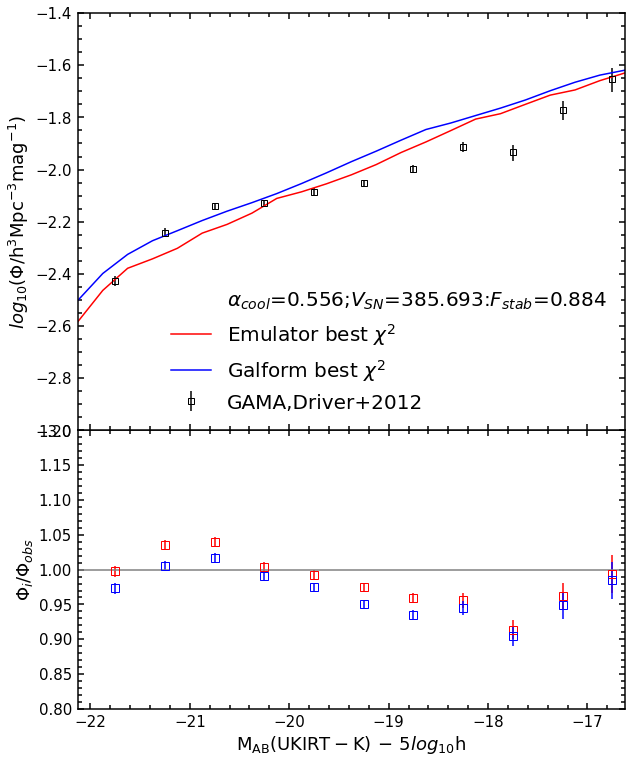

In [46]:
# K LF
fig = plt.figure(20,figsize=(9.8,12.8))
gs = gridspec.GridSpec(5,1)
gs.update(wspace=0., hspace=0.)
xmin = np.min(bins_K[:,0]) #np.min(bins_K[:,0])
n = int(np.max(bins_K[:,0])-np.min(bins_K[:,0]))/0.5
xmax = np.min(bins_K[:,0]) + n*0.5 +0.5 #np.max(bins_K[:,0])
ymin = -3 ; ymax = -1.4
yminb = 0.8 ; ymaxb = 1.2
xtit = "${{\\rm M_{AB}(UKIRT-K)}\, -\, 5log_{10}{\\rm h}}$"
ytit = "$log_{10}(\Phi/ \\rm{h^{3} Mpc^{-3} mag^{-1}})$"
ytitb = r'$\Phi_{i}/\Phi_{obs}$'
axb = plt.subplot(gs[-2:,:])
axb.set_autoscale_on(False) ; axb.minorticks_on()
axb.set_xlim(xmin,xmax) ; axb.set_ylim(yminb,ymaxb)
axb.set_xlabel(xtit) ; axb.set_ylabel(ytitb)
ax = plt.subplot(gs[:-2,:],sharex=axb)
ax.set_ylabel(ytit)
ax.set_autoscale_on(False) ; ax.minorticks_on()
ax.set_ylim(ymin,ymax) ; start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(np.min(bins_K[:,0]), np.max(bins_K[:,0]), 1))
ax.plot([],[],' ')
plt.setp(ax.get_xticklabels(), visible=False)
ax.errorbar(x_K_f, y_K_f, yerr=[el_K_f,eh_K_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="GAMA, Driver+2012")
ax.plot(bins_K[:,0], pre_K[i_best][0],'-r')
ax.plot(bins_K[:,0], bestfit_K,'-b')
#axb.errorbar(m_center_f,pre_f_array/smf_f,xerr=[m_center_f-m_low_f,m_upp_f-m_center_f], yerr=[pre_f_array/smf_f-pre_f_array/(smf_f-(np.log10(p3[ind])-np.log10(p3[ind]-dp3[ind]))), pre_f_array/(smf_f+np.log10(p3[ind]+dp3[ind])-np.log10(p3[ind]))-pre_f_array/smf_f],ls='None',c='b',markersize=8)
axb.errorbar(x_K_f,pre_K_f_array/y_K_f, yerr=[pre_K_f_array/y_K_f-pre_K_f_array/(y_K_f-el_K_f), pre_K_f_array/(y_K_f+eh_K_f)-pre_K_f_array/y_K_f],ls='None',mfc='None', ecolor = 'r', mec='r',marker='s',c='r',markersize=8)
axb.errorbar(x_K_f,bestfit_K_f/y_K_f, yerr=[bestfit_K_f/y_K_f-bestfit_K_f/(y_K_f-el_K_f), bestfit_K_f/(y_K_f+eh_K_f)-bestfit_K_f/y_K_f],ls='None',mfc='None', ecolor = 'b', mec='b',marker='s',c='b',markersize=8)
axb.axhline(y=1,ls='-',c='grey')
label0 = r'$\alpha_{cool}$='+str(round(alpha_cool_bestfit[0][0],3))+r';$V_{SN}$='+str(round(v_SN_bestfit[0][0],3))+r':$F_{stab}$='+str(round(F_stab_bestfit[0][0],3))
label = r'Emulator best $\chi^{2}$'
label1p=r'Galform best $\chi^{2}$'
label1 = "GAMA,Driver+2012" 
leg = ax.legend([label0,label,label1p,label1], loc=4,fontsize=20)
leg.draw_frame(False) 
plt.show()
#plt.savefig('best_fit.png',facecolor='white', transparent=False)

outfil = 'bestfit_K_em3.dat'
tofile = zip(bins_K[:,0],pre_K[i_best][0])
with open(outfil, 'w') as outf: # written mode (not appended)
    outf.write('# m_K-5*log10(h), log10(Phi*Mpc**3*m/h**3)\n')
    np.savetxt(outf,list(tofile))#,fmt=('%.5f'))
    outf.closed 

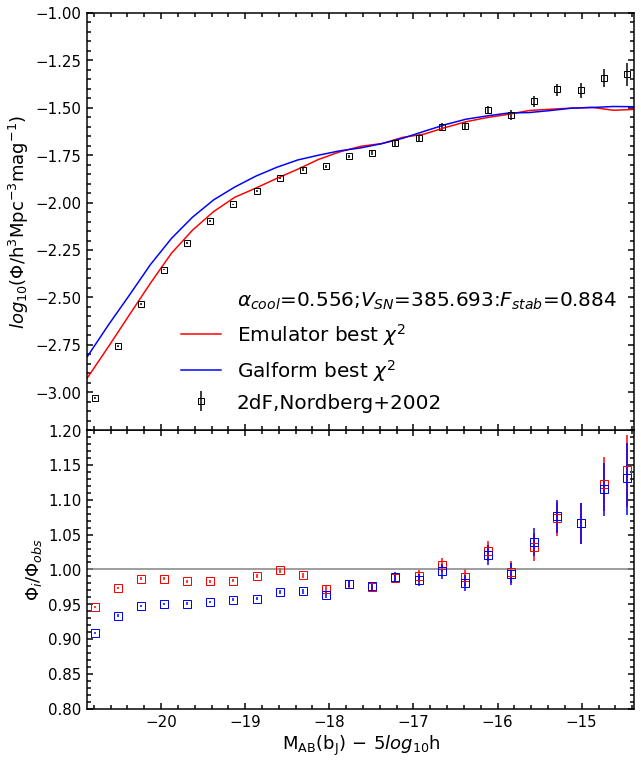

In [47]:
# bJ LF
fig = plt.figure(20,figsize=(9.8,12.8))
gs = gridspec.GridSpec(5,1)
gs.update(wspace=0., hspace=0.)
xmin = np.min(bins_bJ[:,0]) #np.min(bins_K[:,0])
n = int(np.max(bins_bJ[:,0])-np.min(bins_bJ[:,0]))/0.5
xmax = np.min(bins_bJ[:,0]) + n*0.5 +0.5 #np.max(bins_K[:,0])
ymin = -3.2 ; ymax = -1
yminb = 0.8 ; ymaxb = 1.2
xtit = "${{\\rm M_{AB}(b_{J})}\, -\, 5log_{10}{\\rm h}}$"
ytit = "$log_{10}(\Phi/ \\rm{h^{3} Mpc^{-3} mag^{-1}})$"
ytitb = r'$\Phi_{i}/\Phi_{obs}$'
axb = plt.subplot(gs[-2:,:])
axb.set_autoscale_on(False) ; axb.minorticks_on()
axb.set_xlim(xmin,xmax) ; axb.set_ylim(yminb,ymaxb)
axb.set_xlabel(xtit) ; axb.set_ylabel(ytitb)
ax = plt.subplot(gs[:-2,:],sharex=axb)
ax.set_ylabel(ytit)
ax.set_autoscale_on(False) ; ax.minorticks_on()
ax.set_ylim(ymin,ymax) ; start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(np.min(bins_bJ[:,0]), np.max(bins_bJ[:,0]), 0.5))
ax.plot([],[],' ')
plt.setp(ax.get_xticklabels(), visible=False)
ax.errorbar(x_bJ_f, y_bJ_f, yerr=[el_bJ_f,eh_bJ_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="GAMA, Driver+2012")
ax.plot(bins_bJ[:,0], pre_bJ[i_best][0],'-r')
ax.plot(bins_bJ[:,0], bestfit_bJ,'-b')
#axb.errorbar(m_center_f,pre_f_array/smf_f,xerr=[m_center_f-m_low_f,m_upp_f-m_center_f], yerr=[pre_f_array/smf_f-pre_f_array/(smf_f-(np.log10(p3[ind])-np.log10(p3[ind]-dp3[ind]))), pre_f_array/(smf_f+np.log10(p3[ind]+dp3[ind])-np.log10(p3[ind]))-pre_f_array/smf_f],ls='None',c='b',markersize=8)
axb.errorbar(x_bJ_f,pre_bJ_f_array/y_bJ_f, yerr=[pre_bJ_f_array/y_bJ_f-pre_bJ_f_array/(y_bJ_f-el_bJ_f), pre_bJ_f_array/(y_bJ_f+eh_bJ_f)-pre_bJ_f_array/y_bJ_f],ls='None',mfc='None', ecolor = 'r', mec='r',marker='s',c='r',markersize=8)
axb.errorbar(x_bJ_f,bestfit_bJ_f/y_bJ_f, yerr=[bestfit_bJ_f/y_bJ_f-bestfit_bJ_f/(y_bJ_f-el_bJ_f), bestfit_bJ_f/(y_bJ_f+eh_bJ_f)-bestfit_bJ_f/y_bJ_f],ls='None',mfc='None', ecolor = 'b', mec='b',marker='s',c='b',markersize=8)
axb.axhline(y=1,ls='-',c='grey')
label0 = r'$\alpha_{cool}$='+str(round(alpha_cool_bestfit[0][0],3))+r';$V_{SN}$='+str(round(v_SN_bestfit[0][0],3))+r':$F_{stab}$='+str(round(F_stab_bestfit[0][0],3))
label = r'Emulator best $\chi^{2}$'
label1p=r'Galform best $\chi^{2}$'
label1 = "2dF,Nordberg+2002" 
leg = ax.legend([label0,label,label1p,label1], loc=4,fontsize=20)
leg.draw_frame(False) 
plt.show()
#plt.savefig('best_fit.png',facecolor='white', transparent=False)

outfil = 'bestfit_bJ_em3.dat'
tofile = zip(bins_bJ[:,0],pre_bJ[i_best][0])
with open(outfil, 'w') as outf: # written mode (not appended)
    outf.write('# m_bJ-5*log10(h), log10(Phi*Mpc**3*m/h**3)\n')
    np.savetxt(outf,list(tofile))#,fmt=('%.5f'))
    outf.closed 

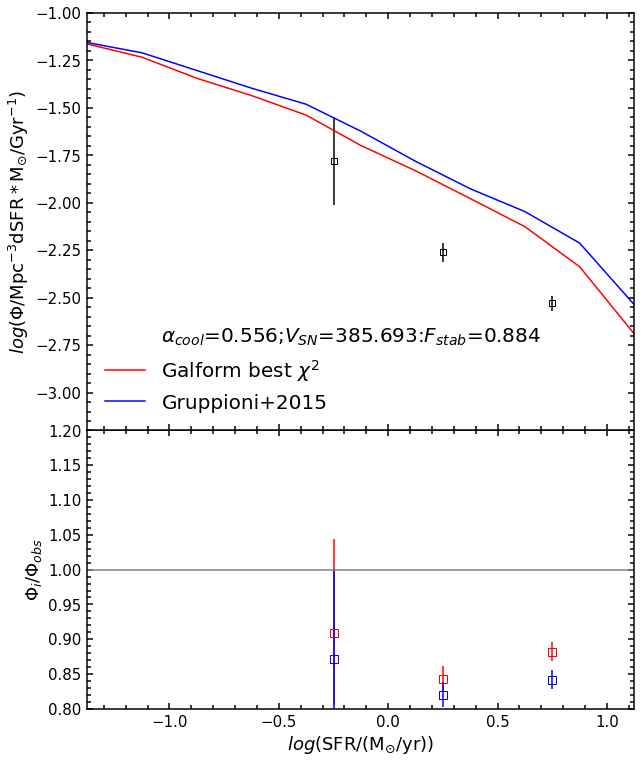

In [48]:
# SFRF
fig = plt.figure(20,figsize=(9.8,12.8))
gs = gridspec.GridSpec(5,1)
gs.update(wspace=0., hspace=0.)
xmin = np.min(bins_s[:,0]) #np.min(bins_K[:,0])
n = int(np.max(bins_s[:,0])-np.min(bins_s[:,0]))/0.5
xmax = np.min(bins_s[:,0]) + n*0.5 +0.5 #np.max(bins_K[:,0])
ymin = -3.2 ; ymax = -1
yminb = 0.8 ; ymaxb = 1.2
xtit = "$log (\\rm SFR /(M_{\odot}/yr))$"
ytit = "${log(\Phi/ \\rm{Mpc^{-3} d{\\rm SFR*M_{\odot}/Gyr^{-1}}}})$"
ytitb = r'$\Phi_{i}/\Phi_{obs}$'
axb = plt.subplot(gs[-2:,:])
axb.set_autoscale_on(False) ; axb.minorticks_on()
axb.set_xlim(xmin,xmax) ; axb.set_ylim(yminb,ymaxb)
axb.set_xlabel(xtit) ; axb.set_ylabel(ytitb)
ax = plt.subplot(gs[:-2,:],sharex=axb)
ax.set_ylabel(ytit)
ax.set_autoscale_on(False) ; ax.minorticks_on()
ax.set_ylim(ymin,ymax) ; start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(np.min(bins_s[:,0]), np.max(bins_s[:,0]), 0.5))
ax.plot([],[],' ')
plt.setp(ax.get_xticklabels(), visible=False)
ax.errorbar(x_s_f, y_s_f, yerr=emid_s_f, ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="GAMA, Driver+2012")
ax.plot(bins_s[:,0], pre_s[i_best][0],'-r')
ax.plot(bins_s[:,0], bestfit_s,'-b')
#axb.errorbar(m_center_f,pre_f_array/smf_f,xerr=[m_center_f-m_low_f,m_upp_f-m_center_f], yerr=[pre_f_array/smf_f-pre_f_array/(smf_f-(np.log10(p3[ind])-np.log10(p3[ind]-dp3[ind]))), pre_f_array/(smf_f+np.log10(p3[ind]+dp3[ind])-np.log10(p3[ind]))-pre_f_array/smf_f],ls='None',c='b',markersize=8)
axb.errorbar(x_s_f,pre_s_f_array/y_s_f, yerr=[pre_s_f_array/y_s_f-pre_s_f_array/(y_s_f-emid_s_f), pre_s_f_array/(y_s_f+emid_s_f)-pre_s_f_array/y_s_f],ls='None',mfc='None', ecolor = 'r', mec='r',marker='s',c='r',markersize=8)
axb.errorbar(x_s_f,bestfit_s_f/y_s_f, yerr=[bestfit_s_f/y_s_f-bestfit_s_f/(y_s_f-emid_s_f), bestfit_s_f/(y_s_f+emid_s_f)-bestfit_s_f/y_s_f],ls='None',mfc='None', ecolor = 'b', mec='b',marker='s',c='b',markersize=8)
axb.axhline(y=1,ls='-',c='grey')
label0 = r'$\alpha_{cool}$='+str(round(alpha_cool_bestfit[0][0],3))+r';$V_{SN}$='+str(round(v_SN_bestfit[0][0],3))+r':$F_{stab}$='+str(round(F_stab_bestfit[0][0],3))
#label = r'Emulator best $\chi^{2}$'
label1p=r'Galform best $\chi^{2}$'
label1 = "Gruppioni+2015" 
leg = ax.legend([label0,label1p,label1], loc=3,fontsize=20)
leg.draw_frame(False) 
plt.show()
#plt.savefig('best_fit.png',facecolor='white', transparent=False)

outfil = 'bestfit_s_em3.dat'
tofile = zip(bins_s[:,0],pre_s[i_best][0])
with open(outfil, 'w') as outf: # written mode (not appended)
    outf.write('# log10(SFR*year/Msunh), log10(Phi*Mpc**3*dSFR)\n')
    np.savetxt(outf,list(tofile))#,fmt=('%.5f'))
    outf.closed 

[0.11334535 0.21373188 0.32636    0.3107402  0.413446   0.539749
 0.49727569 0.803347   0.62214378]
0.32636

0.07601134980738511 0.11535238312578622 0.18905393413075267
[0.12680589 0.12680589 0.12680589 0.12680589 0.12680589 0.12680589
 0.12680589 0.12680589 0.12680589]
[0.11234535 0.12680589 0.12680589 0.12680589 0.12680589 0.12680589
 0.12680589 0.12680589 0.12680589]


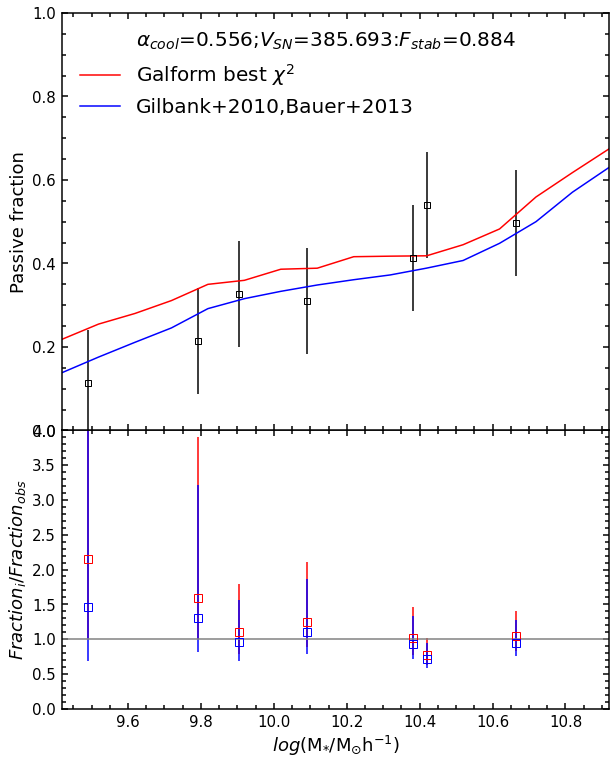

In [49]:
# linear interpolation for error: 2,5 and 7 points obs data
print(y_p_f)
print(y_p_f[2])
print()
e2 = y_p_f[2]-((y_p_f[3]-y_p_f[1])/(x_p_f[3]-x_p_f[1])*(x_p_f[2]-x_p_f[1]) + y_p_f[1])
e5 = y_p_f[5]-((y_p_f[6]-y_p_f[4])/(x_p_f[6]-x_p_f[4])*(x_p_f[5]-x_p_f[4]) + y_p_f[4])
e7 = y_p_f[7]-((y_p_f[8]-y_p_f[6])/(x_p_f[8]-x_p_f[6])*(x_p_f[7]-x_p_f[6]) + y_p_f[6])
print(e2,e5,e7)
e_bauer = np.mean([e2,e5,e7])
e_bauer_a = e_bauer*np.linspace(1,1,len(y_p_f))
print(e_bauer_a)
e_bauer_a_u = np.copy(e_bauer_a)
e_bauer_a_l = np.copy(e_bauer_a)
e_bauer_a_l[0] = y_p_f[0]-0.001

# passive
fig = plt.figure(20,figsize=(9.8,12.8))
gs = gridspec.GridSpec(5,1)
gs.update(wspace=0., hspace=0.)
xmin = np.min(bins_p[:,0]) #np.min(bins_K[:,0])
n = int(np.max(bins_p[:,0])-np.min(bins_p[:,0]))/0.5
xmax = np.min(bins_p[:,0]) + n*0.5 +0.5 #np.max(bins_K[:,0])
ymin = 0 ; ymax = 1
yminb = 0 ; ymaxb = 4
xtit = "$log(\\rm{M_{*}/M_{\odot} h^{-1}})$"
ytit = "Passive fraction"
ytitb = '$Fraction_{i}/Fraction_{obs}$'
axb = plt.subplot(gs[-2:,:])
axb.set_autoscale_on(False) ; axb.minorticks_on()
axb.set_xlim(xmin,xmax) ; axb.set_ylim(yminb,ymaxb)
axb.set_xlabel(xtit) ; axb.set_ylabel(ytitb)
ax = plt.subplot(gs[:-2,:],sharex=axb)
ax.set_ylabel(ytit)
ax.set_autoscale_on(False) ; ax.minorticks_on()
ax.set_ylim(ymin,ymax) ; start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(np.min(bins_p[:,0]), np.max(bins_p[:,0]), 0.5))
ax.plot([],[],' ')
plt.setp(ax.get_xticklabels(), visible=False)
ax.errorbar(x_p_f, y_p_f, yerr=[e_bauer_a_l,e_bauer_a_u], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="GAMA, Driver+2012")
ax.plot(bins_p[:,0], pre_p[i_best][0],'-r')
ax.plot(bins_p[:,0], bestfit_p,'-b')
#axb.errorbar(m_center_f,pre_f_array/smf_f,xerr=[m_center_f-m_low_f,m_upp_f-m_center_f], yerr=[pre_f_array/smf_f-pre_f_array/(smf_f-(np.log10(p3[ind])-np.log10(p3[ind]-dp3[ind]))), pre_f_array/(smf_f+np.log10(p3[ind]+dp3[ind])-np.log10(p3[ind]))-pre_f_array/smf_f],ls='None',c='b',markersize=8)
axb.errorbar(x_p_f,pre_p_f_array/y_p_f, yerr=[pre_p_f_array/y_p_f-pre_p_f_array/(y_p_f-e_bauer_a_l), pre_p_f_array/(y_p_f+e_bauer_a_u)-pre_p_f_array/y_p_f],ls='None',mfc='None', ecolor = 'r', mec='r',marker='s',c='r',markersize=8)
print(e_bauer_a_l)
axb.errorbar(x_p_f,bestfit_p_f/y_p_f, yerr=[bestfit_p_f/y_p_f-bestfit_p_f/(y_p_f-e_bauer_a_l), bestfit_p_f/(y_p_f+e_bauer_a_u)-bestfit_p_f/y_p_f],ls='None',mfc='None', ecolor = 'b', mec='b',marker='s',c='b',markersize=8)
axb.axhline(y=1,ls='-',c='grey')
label0 = r'$\alpha_{cool}$='+str(round(alpha_cool_bestfit[0][0],3))+r';$V_{SN}$='+str(round(v_SN_bestfit[0][0],3))+r':$F_{stab}$='+str(round(F_stab_bestfit[0][0],3))
#label = r'Emulator best $\chi^{2}$'
label1p=r'Galform best $\chi^{2}$'
label1 = "Gilbank+2010,Bauer+2013" 
leg = ax.legend([label0,label1p,label1], loc=2,fontsize=20)
leg.draw_frame(False) 
plt.show()
#plt.savefig('best_fit.png',facecolor='white', transparent=False)

outfil = 'bestfit_p_em3.dat'
tofile = zip(bins_p[:,0],pre_p[i_best][0])
with open(outfil, 'w') as outf: # written mode (not appended)
    outf.write('# log10(M*h/Msun), Passive fraction\n')
    np.savetxt(outf,list(tofile))#,fmt=('%.5f'))
    outf.closed 